In [1]:
import pandas as pd
import numpy as np
from holidays_co import get_colombia_holidays_by_year

In [94]:
import seaborn
seaborn.set_style("whitegrid")
import matplotlib.pyplot as plt
import numpy

In [3]:
festivos = pd.DataFrame()
for a in [2019,2020,2021]:
    holidays = pd.DataFrame(get_colombia_holidays_by_year(a))
    festivos = festivos.append(holidays)

In [4]:
interim_path = '../data/interim/'

In [5]:
pd.set_option('display.max_rows', None)

In [6]:
otros_path = '../data/otros/'

# Read New Variables

In [38]:
nuevas_variables = pd.read_csv(interim_path + "nuevas_variables.csv")

In [39]:
nuevas_variables.head()

Estación   latitud   longitud                          lat_lon  \
0  CAI 20 de Julio  4.572611 -74.092556    ('4.5726111', '-74.09255556')   
1  CAI 7 de Agosto  4.658056 -74.076944  ('4.658055556', '-74.07694444')   
2       CAI Alamos  4.690161 -74.117250       ('4.6901611', '-74.11725')   
3     CAI Americas  4.619192 -74.139075      ('4.6191917', '-74.139075')   
4       CAI Aurora  4.519842 -74.121650       ('4.5198417', '-74.12165')   

   conteo_bares_500m  conteo_bares_1km  conteo_bares_2km  \
0                0.0               0.0               0.0   
1                0.0               0.0              14.0   
2                0.0               1.0              21.0   
3               16.0              17.0              17.0   
4                0.0               0.0               0.0   

   conteo_colegios_500m  conteo_colegios_1km  conteo_colegios_2km  ...  \
0                  14.0                 47.0                142.0  ...   
1                   4.0                 17.0                 97.0  ...   
2                   0.0                 11.0                104.0  ...   
3                   8.0                 25.0                122.0  ...   
4                   9.0                 17.0                 45.0  ...   

   TP9_3_4_NO  TP9_3_5_NO  TP9_3_6_NO  TP9_3_7_NO  TP9_3_8_NO  TP9_3_99_N  \
0         0.0        15.0        10.0         7.0         0.0         4.0   
1         0.0        12.0         0.0         1.0         0.0         3.0   
2         0.0         1.0        10.0         4.0         0.0         2.0   
3         0.0        17.0         5.0         8.0         0.0         2.0   
4         0.0        20.0        14.0        31.0         0.0         0.0   

   TP9_3_9_NO  TP9_3_USO  TP9_4_USO  TVIVIENDA  
0         0.0     1049.0        0.0     3743.0  
1         0.0     1672.0        0.0     3053.0  
2         0.0      396.0        0.0     1398.0  
3         0.0      789.0        0.0     2822.0  
4         0.0      438.0        0.0     8231.0  

[5 rows x 100 columns]

# SDA Datasets

In [40]:
#SDA_fecha_hora = pd.read_csv(otros_path + 'df_group_fecha_hora.csv',sep=';')

In [41]:
SDA_fecha_hora = pd.read_csv(otros_path + 'cleaned_data/df_group_fecha_hora.csv',sep=';')

In [42]:
SDA_fecha_hora = SDA_fecha_hora[SDA_fecha_hora.Origen == 'SDA']

In [43]:
SDA_fecha_hora= SDA_fecha_hora[SDA_fecha_hora.Variable=='Leq']

In [44]:
SDA_fecha_hora.head()

Componente         Estación Variable Date_no_hour  Hora  Valor_max  \
48988      Ruido  CAI 20 de Julio      Leq   2019-04-10     0       65.3   
48989      Ruido  CAI 20 de Julio      Leq   2019-04-10     1       65.1   
48990      Ruido  CAI 20 de Julio      Leq   2019-04-10     2       65.2   
48991      Ruido  CAI 20 de Julio      Leq   2019-04-10     3       67.4   
48992      Ruido  CAI 20 de Julio      Leq   2019-04-10     4       69.3   

       Valor_mean  Valor_median  Valor_min  max-min nombre corto   latitud  \
48988       64.20         64.20       63.1      2.2     CAI20JUL  4.572611   
48989       63.80         63.80       62.5      2.6     CAI20JUL  4.572611   
48990       64.25         64.25       63.3      1.9     CAI20JUL  4.572611   
48991       66.45         66.45       65.5      1.9     CAI20JUL  4.572611   
48992       68.25         68.25       67.2      2.1     CAI20JUL  4.572611   

        longitud  altitud  altura suelo Origen  
48988 -74.092556      NaN           NaN    SDA  
48989 -74.092556      NaN           NaN    SDA  
48990 -74.092556      NaN           NaN    SDA  
48991 -74.092556      NaN           NaN    SDA  
48992 -74.092556      NaN           NaN    SDA

In [45]:
SDA_fecha_hora = SDA_fecha_hora.drop(['latitud','longitud','altitud','altura suelo','Origen'],axis=1)

In [46]:
SDA_fecha_hora.Date_no_hour.min()

'2017-06-30'

In [47]:
SDA_fecha_hora.Date_no_hour.max()

'2020-08-07'

# Merge

In [48]:
merged_df_leq = SDA_fecha_hora.merge(nuevas_variables,how='left',on='Estación')

In [49]:
#merged_df_leq= merged_df[merged_df.Variable=='Leq']

In [50]:
del(SDA_fecha_hora)
del(nuevas_variables)

In [51]:
merged_df_leq["Fecha"] = pd.to_datetime(merged_df_leq.Date_no_hour).apply(lambda x: x.date())

In [52]:
merged_df_leq['weekday'] = pd.to_datetime(merged_df_leq.Date_no_hour).dt.dayofweek + 1

In [53]:
merged_df_leq['weekday']  = (merged_df_leq
                                    .apply(lambda x: -1 if x['Date_no_hour'] in festivos.date.values else x['weekday'],
                                           axis=1)
                                    )

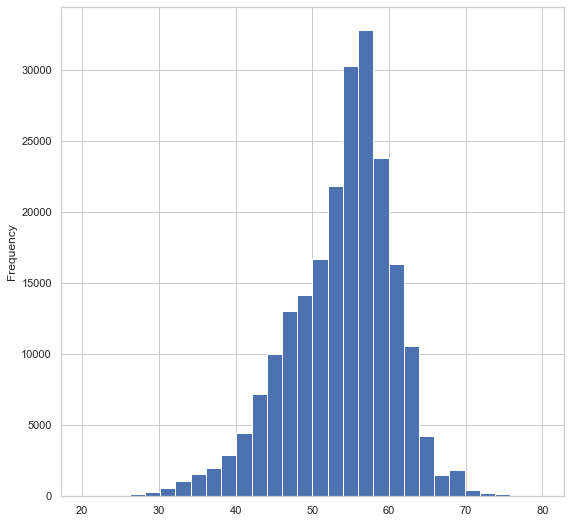

In [95]:
merged_df_leq.Valor_mean.plot(kind='hist',bins=30)

In [59]:
merged_df_leq_not_na = merged_df_leq.dropna()

In [60]:
merged_df_leq_not_na = merged_df_leq_not_na[(
    (merged_df_leq_not_na.Valor_mean > 20) &
    (merged_df_leq_not_na.Valor_mean < 80))]

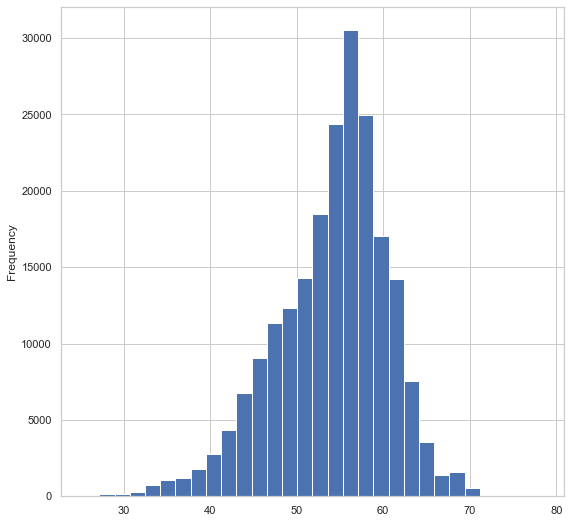

In [96]:
merged_df_leq_not_na.Valor_mean.plot(kind='hist',bins=30)

## Filter outliers

In [62]:
len(merged_df_leq_not_na)

218510

In [63]:
outlierConstant = 1.5
merged_df_leq_not_na_outliers = pd.DataFrame()

for station in merged_df_leq_not_na.Estación.unique():
    estacion_df = merged_df_leq_not_na[merged_df_leq_not_na.Estación == station ]
    upper_quartile = np.percentile(estacion_df.Valor_mean, 75)
    lower_quartile = np.percentile(estacion_df.Valor_mean, 25)

    IQR = (upper_quartile - lower_quartile) * outlierConstant

    quartileSet = (lower_quartile - IQR, upper_quartile + IQR)

    cleaned_estacion_df = estacion_df[((estacion_df.Valor_mean >= quartileSet[0])&(estacion_df.Valor_mean <= quartileSet[1]))]
    
    merged_df_leq_not_na_outliers = pd.concat([merged_df_leq_not_na_outliers,cleaned_estacion_df])

In [64]:
len(merged_df_leq_not_na_outliers)

210716

In [65]:
merged_df_leq_not_na = merged_df_leq_not_na_outliers

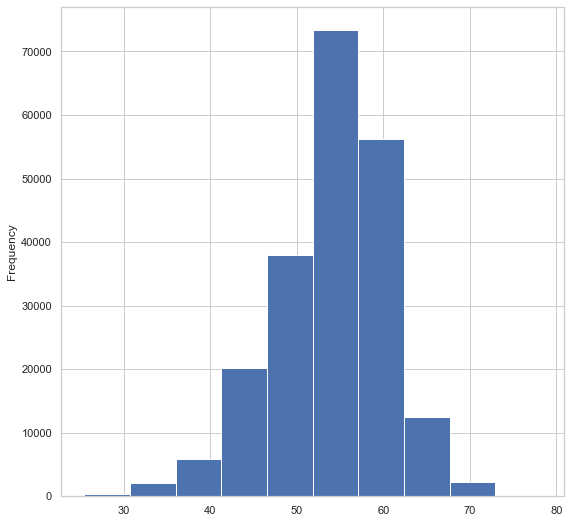

In [97]:
merged_df_leq_not_na_outliers.Valor_mean.plot(kind='hist')

## Correlations

In [67]:
descriptive =merged_df_leq_not_na.describe().T

In [68]:
descriptive

count          mean           std            min  \
Hora                  210716.0  1.177113e+01  6.812803e+00       0.000000   
Valor_max             210716.0  6.814100e+01  6.030125e+00      37.700000   
Valor_mean            210716.0  5.403870e+01  6.509223e+00      25.441176   
Valor_median          210716.0  5.677320e+01  6.125061e+00      26.350000   
Valor_min             210716.0  2.541319e+01  1.198611e+01       0.000000   
max-min               210716.0  4.272782e+01  1.200013e+01       0.000000   
latitud               210716.0  4.656376e+00  5.305836e-02       4.519842   
longitud              210716.0 -7.409694e+01  3.549751e-02     -74.175614   
conteo_bares_500m     210716.0  4.121396e+00  1.317425e+01       0.000000   
conteo_bares_1km      210716.0  6.349347e+00  1.561634e+01       0.000000   
conteo_bares_2km      210716.0  2.367560e+01  3.290948e+01       0.000000   
conteo_colegios_500m  210716.0  8.107301e+00  5.011712e+00       0.000000   
conteo_colegios_1km   210716.0  2.793798e+01  1.224896e+01       5.000000   
conteo_colegios_2km   210716.0  9.693821e+01  3.425225e+01      37.000000   
conteo_hoteles_500m   210716.0  5.281464e+00  7.931708e+00       0.000000   
conteo_hoteles_1km    210716.0  1.359875e+01  1.715709e+01       0.000000   
conteo_hoteles_2km    210716.0  4.241698e+01  5.598157e+01       0.000000   
conteo_ips_500m       210716.0  2.821910e+01  4.144747e+01       1.000000   
conteo_ips_1km        210716.0  7.732768e+01  9.802497e+01       5.000000   
conteo_ips_2km        210716.0  2.151017e+02  2.323141e+02      13.000000   
AREA                  210716.0  5.394248e+05  7.899933e+04  339529.496643   
CTNENCUEST            210716.0  6.504535e+03  2.843804e+03    1794.000000   
DENSIDAD              210716.0  3.997212e+00  3.844442e+00       0.258902   
OBJECTID_1            210716.0  2.322124e+06  1.498271e+06  190976.000000   
OID                   210716.0  2.322124e+06  1.498271e+06  190976.000000   
PERSONAS_L            210716.0  0.000000e+00  0.000000e+00       0.000000   
PERSONAS_S            210716.0  1.506018e+04  8.634201e+03    3109.000000   
TP14_1_TIP            210716.0  1.524581e+03  1.053532e+03     122.000000   
TP14_2_TIP            210716.0  3.707426e+03  2.004895e+03     943.000000   
TP14_3_TIP            210716.0  4.928045e+02  4.772761e+02      10.000000   
TP14_4_TIP            210716.0  3.305729e-01  7.020983e-01       0.000000   
TP14_5_TIP            210716.0  5.251334e-01  9.325849e-01       0.000000   
TP14_6_TIP            210716.0  4.495316e+00  7.496968e+00       0.000000   
TP15_1_OCU            210716.0  5.308049e+03  2.684487e+03    1162.000000   
TP15_2_OCU            210716.0  4.553239e+01  4.751203e+01       0.000000   
TP15_3_OCU            210716.0  1.041356e+02  1.853951e+02       1.000000   
TP15_4_OCU            210716.0  2.724448e+02  1.735786e+02      99.000000   
TP16_HOG              210716.0  5.620795e+03  2.925069e+03    1186.000000   
TP19_ACU_1            210716.0  5.299057e+03  2.683795e+03    1161.000000   
TP19_ACU_2            210716.0  8.991842e+00  1.685832e+01       0.000000   
TP19_ALC_1            210716.0  5.297637e+03  2.682484e+03    1159.000000   
TP19_ALC_2            210716.0  1.041269e+01  1.030068e+01       3.000000   
TP19_EE_1             210716.0  5.301717e+03  2.682918e+03    1158.000000   
TP19_EE_2             210716.0  6.332310e+00  4.270695e+00       2.000000   
TP19_EE_E1            210716.0  4.758301e+01  7.862377e+01       2.000000   
TP19_EE_E2            210716.0  1.577209e+03  2.977717e+03      14.000000   
TP19_EE_E3            210716.0  2.472364e+03  1.873768e+03      14.000000   
TP19_EE_E4            210716.0  7.941796e+02  1.486469e+03       2.000000   
TP19_EE_E5            210716.0  2.178599e+02  6.627244e+02       0.000000   
TP19_EE_E6            210716.0  1.754479e+02  5.559954e+02       0.000000   
TP19_EE_E9            210716.0  1.707323e+01  1.500437e+01       0.000000   
TP19_GAS_1           

In [69]:
correlations = merged_df_leq_not_na.corr()

In [70]:
correlations.style.background_gradient(cmap='coolwarm').set_precision(2)

C:\Users\dspinzon\Anaconda3\lib\site-packages\matplotlib\colors.py:527: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1
C:\Users\dspinzon\Anaconda3\lib\site-packages\pandas\io\formats\style.py:1089: RuntimeWarning: All-NaN slice encountered
  smin = np.nanmin(s.to_numpy()) if vmin is None else vmin
C:\Users\dspinzon\Anaconda3\lib\site-packages\pandas\io\formats\style.py:1090: RuntimeWarning: All-NaN slice encountered
  smax = np.nanmax(s.to_numpy()) if vmax is None else vmax


# Split the data

In [72]:
from sklearn.model_selection import train_test_split

In [73]:
# Split Train, and Test Data
leq_train, leq_test, data_target_train, data_target_test = train_test_split(merged_df_leq_not_na,merged_df_leq_not_na.Valor_mean, test_size=0.2, random_state=123)

In [76]:
leq_train.shape

(168572, 112)

In [77]:
data_target_train.shape

(168572,)

In [78]:
leq_test.shape

(42144, 112)

In [79]:
 data_target_test.shape

(42144,)

In [81]:
features_list = [
    'Hora', 'latitud', 'longitud', 'weekday', 'conteo_bares_500m',
    'conteo_bares_1km', 'conteo_bares_2km', 'conteo_colegios_500m',
    'conteo_colegios_1km', 'conteo_colegios_2km', 'conteo_hoteles_500m',
    'conteo_hoteles_1km', 'conteo_hoteles_2km', 'conteo_ips_500m',
    'conteo_ips_1km', 'conteo_ips_2km', 'AREA', 'CTNENCUEST', 'DENSIDAD',
    'OBJECTID_1', 'OID', 'PERSONAS_L', 'PERSONAS_S', 'TP14_1_TIP',
    'TP14_2_TIP', 'TP14_3_TIP', 'TP14_4_TIP', 'TP14_5_TIP', 'TP14_6_TIP',
    'TP15_1_OCU', 'TP15_2_OCU', 'TP15_3_OCU', 'TP15_4_OCU', 'TP16_HOG',
    'TP19_ACU_1', 'TP19_ACU_2', 'TP19_ALC_1', 'TP19_ALC_2', 'TP19_EE_1',
    'TP19_EE_2', 'TP19_EE_E1', 'TP19_EE_E2', 'TP19_EE_E3', 'TP19_EE_E4',
    'TP19_EE_E5', 'TP19_EE_E6', 'TP19_EE_E9', 'TP19_GAS_1', 'TP19_GAS_2',
    'TP19_GAS_9', 'TP19_INTE1', 'TP19_INTE2', 'TP19_INTE9', 'TP19_RECB1',
    'TP19_RECB2', 'TP27_PERSO', 'TP32_1_SEX', 'TP32_2_SEX', 'TP34_1_EDA',
    'TP34_2_EDA', 'TP34_3_EDA', 'TP34_4_EDA', 'TP34_5_EDA', 'TP34_6_EDA',
    'TP34_7_EDA', 'TP34_8_EDA', 'TP34_9_EDA', 'TP3A_RI', 'TP3B_TCN',
    'TP3_1_SI', 'TP3_2_NO', 'TP4_1_SI', 'TP4_2_NO', 'TP51POSTGR', 'TP51PRIMAR',
    'TP51SECUND', 'TP51SUPERI', 'TP51_13_ED', 'TP51_99_ED', 'TP9_1_USO',
    'TP9_2_1_MI', 'TP9_2_2_MI', 'TP9_2_3_MI', 'TP9_2_4_MI', 'TP9_2_9_MI',
    'TP9_2_USO', 'TP9_3_10_N', 'TP9_3_1_NO', 'TP9_3_2_NO', 'TP9_3_3_NO',
    'TP9_3_4_NO', 'TP9_3_5_NO', 'TP9_3_6_NO', 'TP9_3_7_NO', 'TP9_3_8_NO',
    'TP9_3_99_N', 'TP9_3_9_NO', 'TP9_3_USO', 'TP9_4_USO', 'TVIVIENDA'
]

In [82]:
not_useful = ['TP9_4_USO','TP9_2_4_MI','TP3A_RI','TP3B_TCN','TP3_1_SI','PERSONAS_L']

In [83]:
features_list  = [x for x in features_list if x not in not_useful]

In [84]:
data_features_train =leq_train[features_list]
data_features_test =leq_test[features_list]

# Linear Model

In [85]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm

In [86]:
mod1 = sm.OLS(data_target_train.astype(float), data_features_train.astype(float))
test_linearR_sm = mod1.fit()

In [87]:
test_linearR_sm.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                   Results: Ordinary least squares
======================================================================
Model:                OLS              Adj. R-squared:     0.593      
Dependent Variable:   Valor_mean       AIC:                958199.2780
Date:                 2020-11-07 15:26 BIC:                958500.3316
No. Observations:     168572           Log-Likelihood:     -4.7907e+05
Df Model:             29               F-statistic:        8476.      
Df Residuals:         168542           Prob (F-statistic): 0.00       
R-squared:            0.593            Scale:              17.222     
----------------------------------------------------------------------
                      Coef.  Std.Err.     t     P>|t|   [0.025  0.975]
----------------------------------------------------------------------
Hora                  0.1953   0.0015  131.6531 0.0000  0.1924  0.1982
latitud               0.0005   0.0000  349.0602 0.0000  0.0005  0.0005
longitud             -0.0077   0.0000 -359.0325 0.0000 -0.0077 -0.0076
weekday              -0.0854   0.0051  -16.8891 0.0000 -0.0953 -0.0755
conteo_bares_500m     0.0039   0.0000  104.1026 0.0000  0.0038  0.0040
conteo_bares_1km      0.0074   0.0001  132.0255 0.0000  0.0073  0.0076
conteo_bares_2km      0.0187   0.0001  178.1351 0.0000  0.0185  0.0189
conteo_colegios_500m -0.0073   0.0001 -131.6583 0.0000 -0.0074 -0.0072
conteo_colegios_1km  -0.0149   0.0001 -150.0595 0.0000 -0.0151 -0.0147
conteo_colegios_2km  -0.0040   0.0001  -59.3770 0.0000 -0.0042 -0.0039
conteo_hoteles_500m   0.0041   0.0000  128.8259 0.0000  0.0040  0.0042
conteo_hoteles_1km    0.0163   0.0001  150.8256 0.0000  0.0161  0.0165
conteo_hoteles_2km    0.0393   0.0003  149.0893 0.0000  0.0388  0.0398
conteo_ips_500m       0.0012   0.0001   15.5815 0.0000  0.0011  0.0014
conteo_ips_1km        0.0116   0.0002   74.8877 0.0000  0.0113  0.0119
conteo_ips_2km        0.0136   0.0001  100.6579 0.0000  0.0134  0.0139
AREA                  0.0000   0.0000  410.6143 0.0000  0.0000  0.0000
CTNENCUEST            0.0034   0.0000  128.8101 0.0000  0.0033  0.0034
DENSIDAD             -0.0004   0.0000 -133.9691 0.0000 -0.0004 -0.0004
OBJECTID_1           -0.0000   0.0000 -176.2953 0.0000 -0.0000 -0.0000
OID                  -0.0000   0.0000 -176.2953 0.0000 -0.0000 -0.0000
PERSONAS_S           -0.0040   0.0000 -116.4068 0.0000 -0.0041 -0.0039
TP14_1_TIP            0.0176   0.0001  145.6318 0.0000  0.0174  0.0178
TP14_2_TIP           -0.0076   0.0000 -168.4422 0.0000 -0.0077 -0.0075
TP14_3_TIP           -0.0045   0.0001  -30.3540 0.0000 -0.0048 -0.0043
TP14_4_TIP           -0.0001   0.0000  -97.6830 0.0000 -0.0001 -0.0001
TP14_5_TIP            0.0000   0.0000   18.4410 0.0000  0.0000  0.0000
TP14_6_TIP           -0.0059   0.0000 -182.9778 0.0000 -0.0060 -0.0059
TP15_1_OCU            0.0141   0.0001  155.8016 0.0000  0.0139  0.0142
TP15_2_OCU           -0.0356   0.0002 -175.4372 0.0000 -0.0360 -0.0352
TP15_3_OCU           -0.0073   0.0001  -74.2615 0.0000 -0.0075 -0.0071
TP15_4_OCU            0.0284   0.0002  169.3678 0.0000  0.0281  0.0288
TP16_HOG             -0.0276   0.0001 -197.4376 0.0000 -0.0278 -0.0273
TP19_ACU_1            0.0101   0.0001  157.5115 0.0000  0.0100  0.0102
TP19_ACU_2            0.0040   0.0000  131.6123 0.0000  0.0039  0.0040
TP19_ALC_1            0.0067   0.0000  137.8132 0.0000  0.0066  0.0068
TP19_ALC_2            0.0073   0.0000  159.7412 0.0000  0.0072  0.0074
TP19_EE_1             0.0122   0.0001  178.3472 0.0000  0.0120  0.0123
TP19_EE_2             0.0019   0.0000   79.9469 0.0000  0.0018  0.0019
TP19_EE_E1            0.0277   0.0002  145.9229 0.0000  0.0273  0.0281
TP19_EE_E2           -0.0026   0.0001  -46.1352 0.0000 -0.0027 -0.0025
TP19_EE_E3           -0.0061   0.0000 -204.1158 0.0000 -0.0062 -0.0060
TP19_EE_E4           -0.0093   0.0001 -153.3904 0.0000 -0.0094 -0.0092
TP19_EE_E5           -0.0071   0.0001  -98.9346 0.0000 -0.0073 -0.

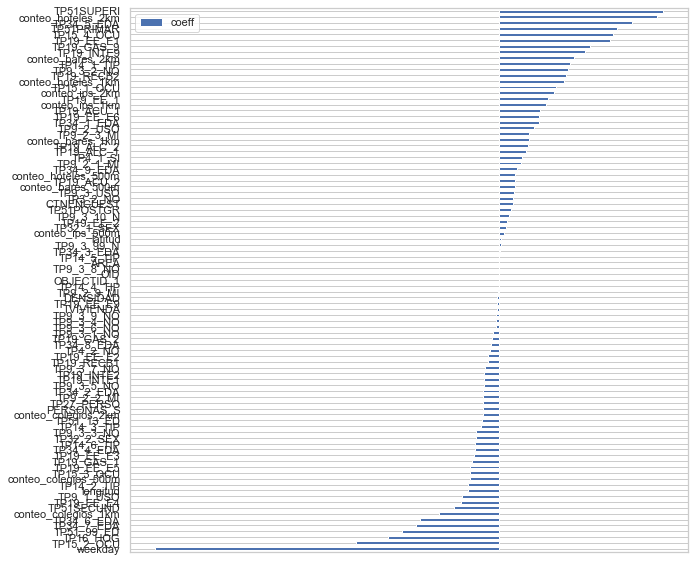

In [98]:
coefs1 = pd.DataFrame(test_linearR_sm.params)

coefs1.columns = ['coeff']

coefs1[1:].sort_values('coeff').plot.barh(figsize=(10,10))
plt.xticks(())
plt.show()

In [99]:
regr = linear_model.LinearRegression()

In [100]:
regr.fit(data_features_train.astype(float),data_target_train.astype(float))

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [101]:
ruido_pred = regr.predict(data_features_train.astype(float))

In [102]:
# print('Coefficients: \n', regr.coef_)
print('Mean squared error: %.2f'
      % mean_squared_error(data_target_train, ruido_pred))
print('RMSE: %.2f'
      %  mean_squared_error(data_target_train, ruido_pred,squared=False))
print('R2: %.2f'
      % r2_score(data_target_train, ruido_pred))

Mean squared error: 17.22
RMSE: 4.15
R2: 0.59


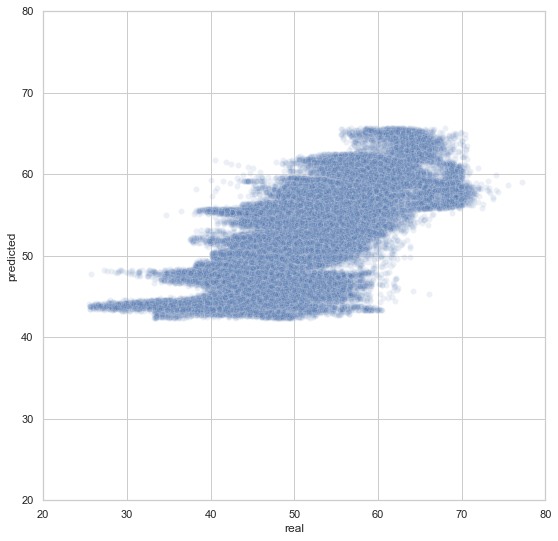

In [103]:
seaborn.set(rc={'figure.figsize':(9,9)})
seaborn.set_style("whitegrid")
ax = seaborn.scatterplot(data_target_train.values,ruido_pred,alpha=0.1)
ax.set(xlabel='real', ylabel='predicted')
ax.set(xlim=(20,80),ylim=(20,80))

plt.show()

# Decission Tree

In [104]:
from sklearn.tree import DecisionTreeRegressor, plot_tree

In [105]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

C:\Users\dspinzon\Anaconda3\lib\site-packages\sklearn\externals\six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


In [106]:
len(data_features_train)*0.005

842.86

In [107]:
regr_1 =DecisionTreeRegressor(#criterion='mse', 
                              #splitter='best', 
                              max_depth=10, 
                              #min_samples_split=10, 
                              min_samples_leaf=900,
                              #min_weight_fraction_leaf=0.0, 
                              max_features=None, 
                              random_state=0, 
                              #max_leaf_nodes=None, 
                              #min_impurity_decrease=0.0, 
                              #min_impurity_split=None, 
                              #presort='deprecated', 
                              #ccp_alpha=0.0
                             )

In [108]:
regr_1.fit(data_features_train.astype(float),data_target_train.astype(float))

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=10,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=900, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=0, splitter='best')

In [109]:
# Make predictions using the testing set
ruido_pred_tree = regr_1.predict(data_features_train.astype(float))

In [110]:
# print('Coefficients: \n', regr.coef_)
print('Mean squared error: %.2f'
      % mean_squared_error(data_target_train, ruido_pred_tree))
print('RMSE: %.2f'
      %  mean_squared_error(data_target_train, ruido_pred_tree,squared=False))
print('R2: %.2f'
      % r2_score(data_target_train, ruido_pred_tree))

Mean squared error: 9.90
RMSE: 3.15
R2: 0.77


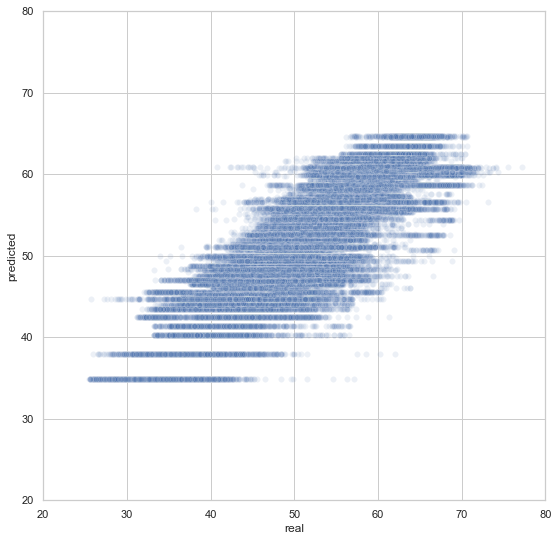

In [111]:
seaborn.set(rc={'figure.figsize':(9,9)})
seaborn.set_style("whitegrid")
ax = seaborn.scatterplot(data_target_train.values,ruido_pred_tree,alpha=0.1)
ax.set(xlabel='real', ylabel='predicted')
ax.set(xlim=(20,80),ylim=(20,80))

plt.show()

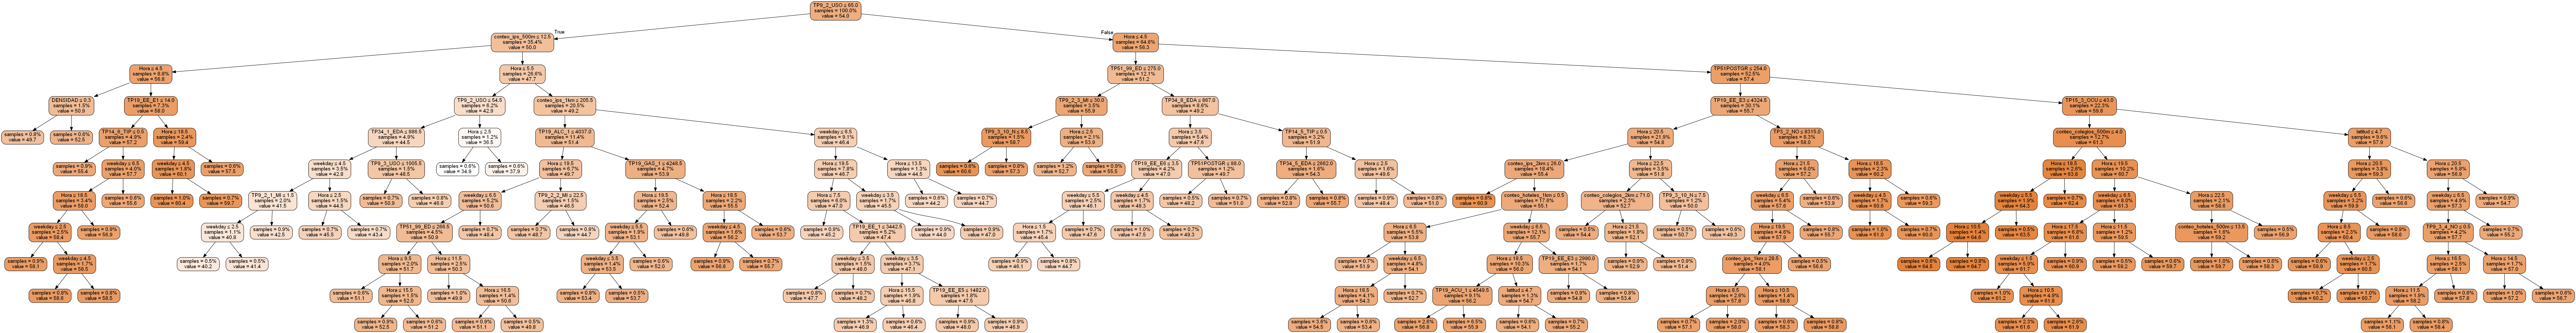

In [113]:
dot_data = StringIO()
export_graphviz(regr_1, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, precision=1,
               feature_names=list(data_features_train.columns),
               impurity=False,
               proportion=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

# Random Forest

In [114]:
from sklearn.ensemble import RandomForestRegressor

In [115]:
rf_model = RandomForestRegressor(n_estimators=100,min_samples_leaf=900)

In [116]:
# Training the data
rf_model.fit(data_features_train.astype(float),data_target_train.astype(float))

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=900,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [117]:
# Make predictions using the testing set
ruido_pred_rf = rf_model.predict(data_features_train.astype(float))

In [118]:
# print('Coefficients: \n', regr.coef_)
print('Mean squared error: %.2f'
      % mean_squared_error(data_target_train, ruido_pred_rf))
print('RMSE: %.2f'
      %  mean_squared_error(data_target_train, ruido_pred_rf,squared=False))
print('R2: %.2f'
      % r2_score(data_target_train, ruido_pred_rf))

Mean squared error: 10.35
RMSE: 3.22
R2: 0.76


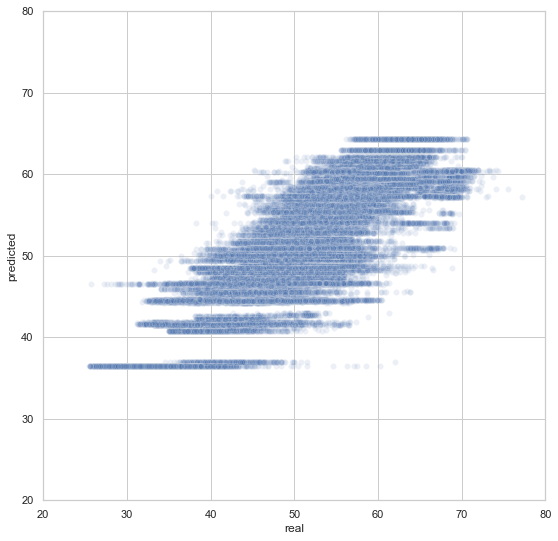

In [119]:
seaborn.set(rc={'figure.figsize':(9,9)})
seaborn.set_style("whitegrid")
ax = seaborn.scatterplot(data_target_train.values,ruido_pred_rf,alpha=0.1)
ax.set(xlabel='real', ylabel='predicted')
ax.set(xlim=(20,80),ylim=(20,80))

plt.show()

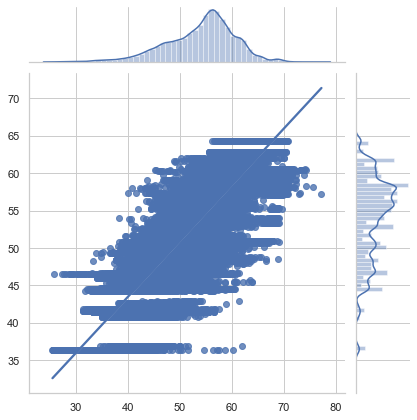

In [120]:
seaborn.jointplot(x=data_target_train.values, y=ruido_pred_rf, kind='reg')
plt.show()

# Gradient boosting

In [121]:
from sklearn.ensemble import GradientBoostingRegressor

In [79]:
for n in [50,100,200]:
    print(n)
    for k in [0.1, 0.2, 0.3, 0.5]:
        print(k,n)
        gb_model = GradientBoostingRegressor(n_estimators=100, min_samples_leaf=1000,random_state=0,max_depth=10, learning_rate=k)
        gb_model.fit(data_features.astype(float),data_target.astype(float))
        ruido_pred_gb = gb_model.predict(data_features.astype(float))
        print('Mean squared error: %.2f'
              % mean_squared_error(data_target, ruido_pred_gb))
        print('RMSE: %.2f'
              %  mean_squared_error(data_target, ruido_pred_gb,squared=False))
        print('R2: %.2f'
              % r2_score(data_target, ruido_pred_gb))



50
0.1 50
Mean squared error: 12.29
RMSE: 3.51
R2: 0.74
0.2 50
Mean squared error: 12.24
RMSE: 3.50
R2: 0.75
0.3 50
Mean squared error: 12.22
RMSE: 3.50
R2: 0.75
0.5 50
Mean squared error: 12.21
RMSE: 3.49
R2: 0.75
100
0.1 100
Mean squared error: 12.29
RMSE: 3.51
R2: 0.74
0.2 100
Mean squared error: 12.24
RMSE: 3.50
R2: 0.75
0.3 100
Mean squared error: 12.22
RMSE: 3.50
R2: 0.75
0.5 100
Mean squared error: 12.21
RMSE: 3.49
R2: 0.75
200
0.1 200
Mean squared error: 12.29
RMSE: 3.51
R2: 0.74
0.2 200
Mean squared error: 12.24
RMSE: 3.50
R2: 0.75
0.3 200
Mean squared error: 12.22
RMSE: 3.50
R2: 0.75
0.5 200
Mean squared error: 12.21
RMSE: 3.49
R2: 0.75


In [122]:
gb_model = GradientBoostingRegressor(n_estimators=100, min_samples_leaf=900,random_state=0,max_depth=10)

In [123]:
# Training data
gb_model.fit(data_features_train.astype(float),data_target_train.astype(float))

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=10,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=900, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=0, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [124]:
# Make predictions using the train set
ruido_pred_train_gb = gb_model.predict(data_features_train.astype(float))

In [125]:
# Make predictions using the test set
ruido_pred_test_gb = gb_model.predict(data_features_test.astype(float))

In [126]:
print('Train performance:')
print('Mean squared error: %.2f'
      % mean_squared_error(data_target_train, ruido_pred_train_gb))
print('RMSE: %.2f'
      %  mean_squared_error(data_target_train, ruido_pred_train_gb,squared=False))
print('R2: %.2f'
      % r2_score(data_target_train, ruido_pred_train_gb))

print('--------------------------')
print('Test performance:')
print('Mean squared error: %.2f'
      % mean_squared_error(data_target_test, ruido_pred_test_gb))
print('RMSE: %.2f'
      %  mean_squared_error(data_target_test, ruido_pred_test_gb,squared=False))
print('R2: %.2f'
      % r2_score(data_target_test, ruido_pred_test_gb))

Train performance:
Mean squared error: 8.44
RMSE: 2.90
R2: 0.80
--------------------------
Test performance:
Mean squared error: 8.49
RMSE: 2.91
R2: 0.80


In [236]:
feature_importance = pd.DataFrame()
feature_importance['features'] = list(data_features_train.columns)
feature_importance['importance'] = list(gb_model.feature_importances_)
feature_importance.sort_values('importance',ascending=False)

features  importance
80             TP9_2_USO    0.269511
0                   Hora    0.254648
13       conteo_ips_500m    0.152387
69            TP51POSTGR    0.078383
14        conteo_ips_1km    0.039912
74            TP51_99_ED    0.025253
3                weekday    0.023334
30            TP15_3_OCU    0.019109
41            TP19_EE_E3    0.011751
88            TP9_3_7_NO    0.009469
44            TP19_EE_E6    0.008833
2               longitud    0.007907
64            TP34_8_EDA    0.007779
12    conteo_hoteles_2km    0.006513
57            TP34_1_EDA    0.006362
39            TP19_EE_E1    0.005321
78            TP9_2_3_MI    0.004883
11    conteo_hoteles_1km    0.004444
29            TP15_2_OCU    0.002952
19            OBJECTID_1    0.002877
36            TP19_ALC_2    0.002841
28            TP15_1_OCU    0.002760
27            TP14_6_TIP    0.002724
81            TP9_3_10_N    0.002578
52            TP19_RECB1    0.002567
7   conteo_colegios_500m    0.002411
82            TP9_3_1_NO    0.002347
38             TP19_EE_2    0.002262
61            TP34_5_EDA    0.002021
65            TP34_9_EDA    0.001846
34            TP19_ACU_2    0.001587
24            TP14_3_TIP    0.001549
40            TP19_EE_E2    0.001519
9    conteo_colegios_2km    0.001513
43            TP19_EE_E5    0.001495
1                latitud    0.001447
8    conteo_colegios_1km    0.001412
20                   OID    0.001342
55            TP32_1_SEX    0.001300
22            TP14_1_TIP    0.001207
6       conteo_bares_2km    0.001138
83            TP9_3_2_NO    0.001032
84            TP9_3_3_NO    0.000952
87            TP9_3_6_NO    0.000830
76            TP9_2_1_MI    0.000776
91            TP9_3_9_NO    0.000744
62            TP34_6_EDA    0.000725
10   conteo_hoteles_500m    0.000703
68              TP4_2_NO    0.000702
51            TP19_INTE9    0.000694
23            TP14_2_TIP    0.000692
86            TP9_3_5_NO    0.000634
18              DENSIDAD    0.000625
71            TP51SECUND    0.000605
31            TP15_4_OCU    0.000545
42            TP19_EE_E4    0.000505
90            TP9_3_99_N    0.000497
92             TP9_3_USO    0.000485
46            TP19_GAS_1    0.000471
47            TP19_GAS_2    0.000447
15        conteo_ips_2km    0.000435
45            TP19_EE_E9    0.000428
70            TP51PRIMAR    0.000413
66              TP3_2_NO    0.000404
21            PERSONAS_S    0.000344
16                  AREA    0.000315
77            TP9_2_2_MI    0.000275
89            TP9_3_8_NO    0.000252
48            TP19_GAS_9    0.000238
33            TP19_ACU_1    0.000224
53            TP19_RECB2    0.000212
63            TP34_7_EDA    0.000207
79            TP9_2_9_MI    0.000199
17            CTNENCUEST    0.000185
5       conteo_bares_1km    0.000182
4      conteo_bares_500m    0.000180
93             TVIVIENDA    0.000172
67              TP4_1_SI    0.000151
50            TP19_INTE2    0.000126
75             TP9_1_USO    0.000093
59            TP34_3_EDA    0.000091
26            TP14_5_TIP    0.000084
58            TP34_2_EDA    0.000084
25            TP14_4_TIP    0.000079
85            TP9_3_4_NO    0.000077
32              TP16_HOG    0.000070
72            TP51SUPERI    0.000061
73            TP51_13_ED    0.000058
49            TP19_INTE1    0.000054
60            TP34_4_EDA    0.000050
37             TP19_EE_1    0.000034
56            TP32_2_SEX    0.000031
54            TP27_PERSO    0.000029
35            TP19_ALC_1    0.000006

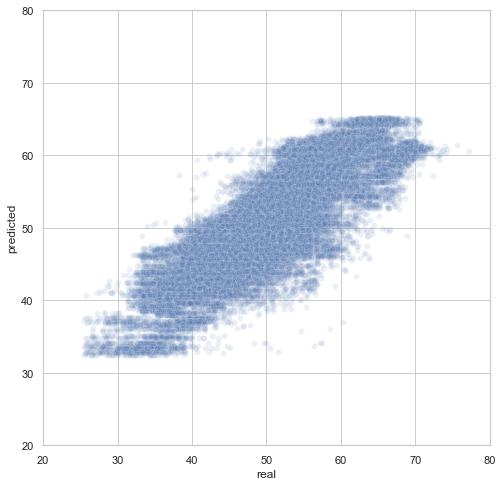

In [127]:
seaborn.set(rc={'figure.figsize':(8,8)})
seaborn.set_style("whitegrid")
ax = seaborn.scatterplot(data_target_train.values,ruido_pred_train_gb,alpha=0.1)
ax.set(xlabel='real', ylabel='predicted')
ax.set(xlim=(20,80),ylim=(20,80))

plt.show()

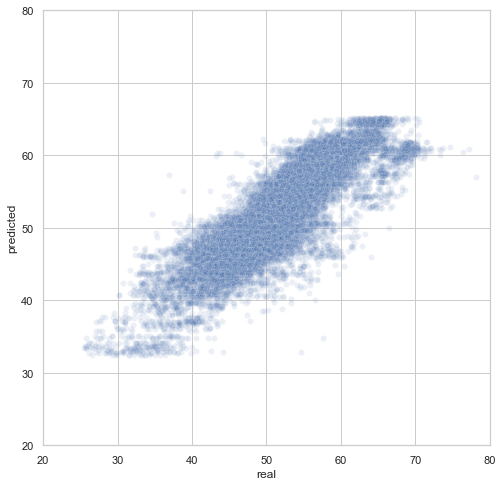

In [128]:
seaborn.set(rc={'figure.figsize':(8,8)})
seaborn.set_style("whitegrid")
ax = seaborn.scatterplot(data_target_test.values,ruido_pred_test_gb,alpha=0.1)
ax.set(xlabel='real', ylabel='predicted')
ax.set(xlim=(20,80),ylim=(20,80))

plt.show()

# Test for each station

In [129]:
test_df = leq_test.copy()

In [130]:
test_df["Valor_mean_pred"] = ruido_pred_test_gb

In [131]:
test_df.head()

Componente        Estación Variable Date_no_hour  Hora  Valor_max  \
71464       Ruido   CAI Normandia      Leq   2019-05-17     3       70.7   
42733       Ruido      CAI Claret      Leq   2020-04-18    23       63.8   
75601       Ruido   CAI Normandia      Leq   2019-11-10     9       76.2   
157546      Ruido  Edificio Marly      Leq   2019-06-25     8       61.7   
75617       Ruido   CAI Normandia      Leq   2019-11-11     1       70.1   

        Valor_mean  Valor_median  Valor_min  max-min  ... TP9_3_7_NO  \
71464    55.738235         59.75       19.9     50.8  ...        7.0   
42733    48.067647         50.70       18.3     45.5  ...        5.0   
75601    63.552941         63.20       50.0     26.2  ...        7.0   
157546   47.258824         51.75       13.3     48.4  ...        3.0   
75617    55.755882         56.60       29.7     40.4  ...        7.0   

        TP9_3_8_NO  TP9_3_99_N TP9_3_9_NO  TP9_3_USO  TP9_4_USO  TVIVIENDA  \
71464          0.0         0.0        0.0      788.0        0.0     3555.0   
42733          0.0         5.0        0.0      750.0        0.0     7244.0   
75601          0.0         0.0        0.0      788.0        0.0     3555.0   
157546         1.0         1.0        1.0      756.0        0.0    10295.0   
75617          0.0         0.0        0.0      788.0        0.0     3555.0   

             Fecha  weekday  Valor_mean_pred  
71464   2019-05-17        5        55.242056  
42733   2020-04-18        6        53.146815  
75601   2019-11-10        7        59.587619  
157546  2019-06-25        2        46.594263  
75617   2019-11-11        1        52.263643  

[5 rows x 113 columns]

CAI Normandia
Cantidad de datos a predecir: 2061.00
Test performance:
Mean squared error: 4.61
RMSE: 2.15
R2: 0.67


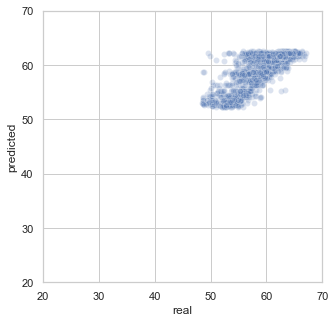

--------------------------
CAI Claret
Cantidad de datos a predecir: 1969.00
Test performance:
Mean squared error: 2.84
RMSE: 1.69
R2: 0.76


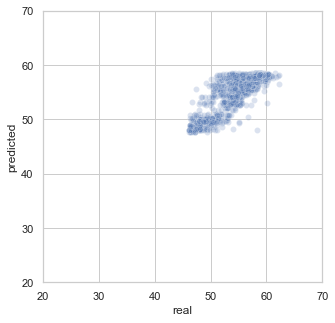

--------------------------
Edificio Marly
Cantidad de datos a predecir: 1843.00
Test performance:
Mean squared error: 10.63
RMSE: 3.26
R2: 0.41


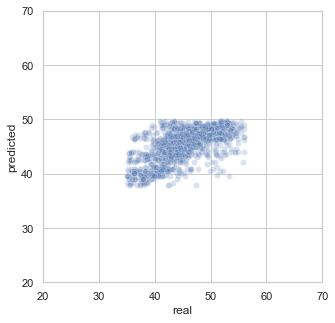

--------------------------
CAI San Victorino
Cantidad de datos a predecir: 961.00
Test performance:
Mean squared error: 8.53
RMSE: 2.92
R2: 0.41


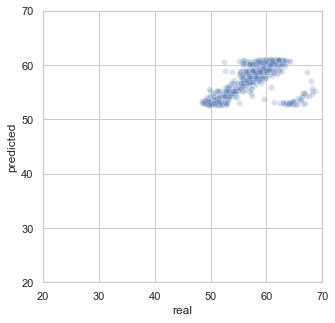

--------------------------
CAI Las Ferias
Cantidad de datos a predecir: 1084.00
Test performance:
Mean squared error: 5.20
RMSE: 2.28
R2: 0.73


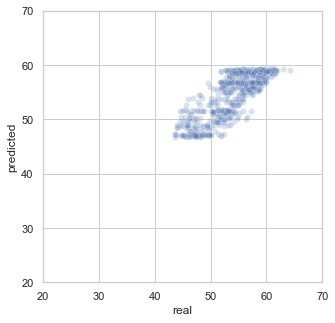

--------------------------
CAI Tejar
Cantidad de datos a predecir: 1353.00
Test performance:
Mean squared error: 3.75
RMSE: 1.94
R2: 0.73


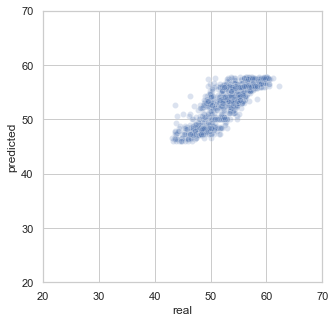

--------------------------
Hotel Morrison
Cantidad de datos a predecir: 1434.00
Test performance:
Mean squared error: 29.50
RMSE: 5.43
R2: 0.18


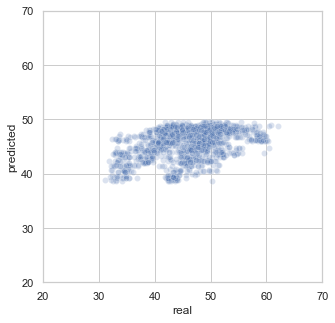

--------------------------
CAI Villa del Prado
Cantidad de datos a predecir: 1159.00
Test performance:
Mean squared error: 3.21
RMSE: 1.79
R2: 0.63


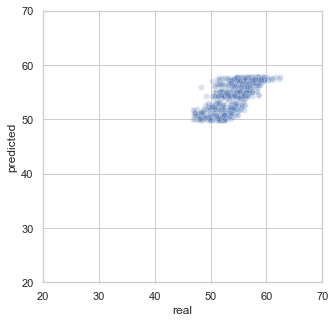

--------------------------
CAI Roma
Cantidad de datos a predecir: 1145.00
Test performance:
Mean squared error: 2.81
RMSE: 1.68
R2: 0.61


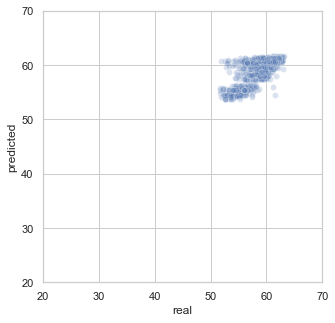

--------------------------
SDA
Cantidad de datos a predecir: 2014.00
Test performance:
Mean squared error: 35.43
RMSE: 5.95
R2: 0.39


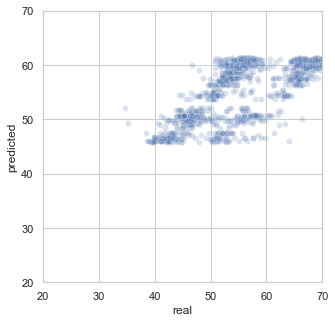

--------------------------
CAI Venecia
Cantidad de datos a predecir: 2074.00
Test performance:
Mean squared error: 3.26
RMSE: 1.81
R2: 0.78


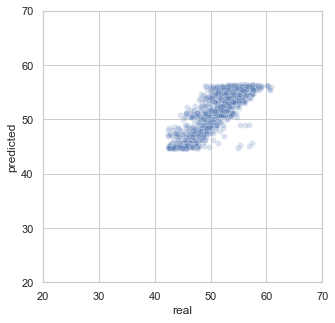

--------------------------
Fontibón
Cantidad de datos a predecir: 1419.00
Test performance:
Mean squared error: 3.87
RMSE: 1.97
R2: 0.41


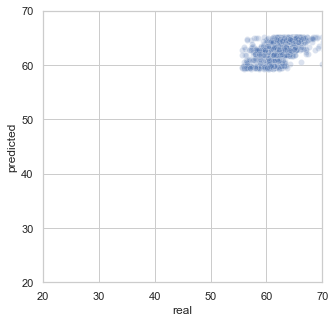

--------------------------
CAI Aurora
Cantidad de datos a predecir: 488.00
Test performance:
Mean squared error: 46.29
RMSE: 6.80
R2: 0.08


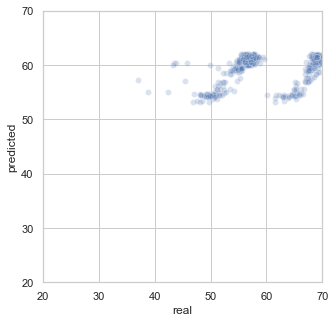

--------------------------
CAI Jaboque
Cantidad de datos a predecir: 1308.00
Test performance:
Mean squared error: 4.26
RMSE: 2.06
R2: 0.73


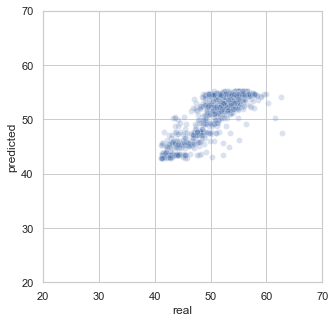

--------------------------
Santa Cecilia
Cantidad de datos a predecir: 2061.00
Test performance:
Mean squared error: 15.90
RMSE: 3.99
R2: 0.70


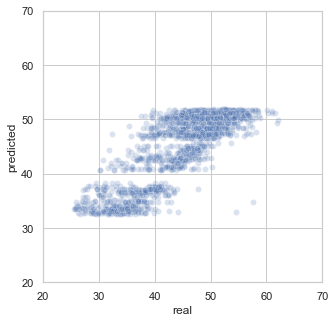

--------------------------
CAI Quirigua
Cantidad de datos a predecir: 1769.00
Test performance:
Mean squared error: 2.66
RMSE: 1.63
R2: 0.66


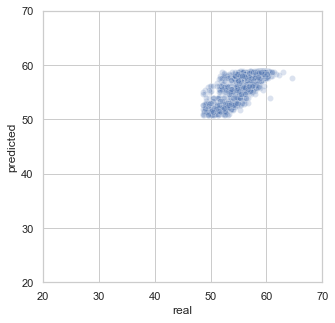

--------------------------
CAI Rincon
Cantidad de datos a predecir: 1923.00
Test performance:
Mean squared error: 5.25
RMSE: 2.29
R2: 0.66


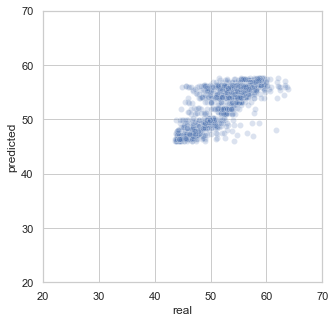

--------------------------
CAI Alamos
Cantidad de datos a predecir: 1984.00
Test performance:
Mean squared error: 4.80
RMSE: 2.19
R2: 0.71


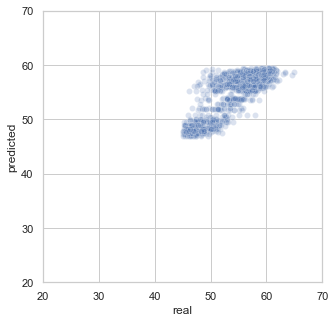

--------------------------
CAI Americas
Cantidad de datos a predecir: 1905.00
Test performance:
Mean squared error: 2.95
RMSE: 1.72
R2: 0.55


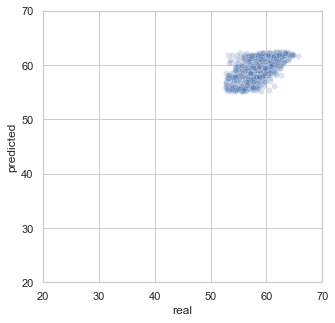

--------------------------
CAI Navarra
Cantidad de datos a predecir: 1195.00
Test performance:
Mean squared error: 2.90
RMSE: 1.70
R2: 0.70


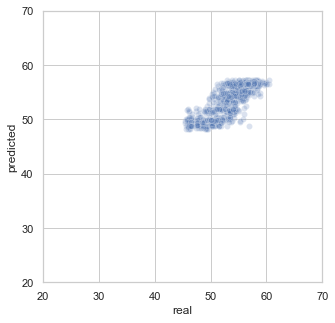

--------------------------
CAI Serena
Cantidad de datos a predecir: 1432.00
Test performance:
Mean squared error: 3.30
RMSE: 1.82
R2: 0.67


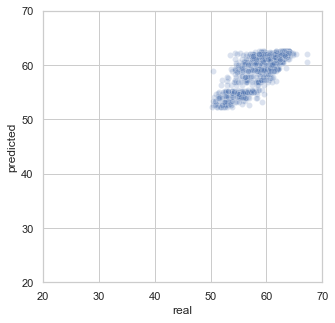

--------------------------
CAI 20 de Julio
Cantidad de datos a predecir: 2101.00
Test performance:
Mean squared error: 6.02
RMSE: 2.45
R2: 0.62


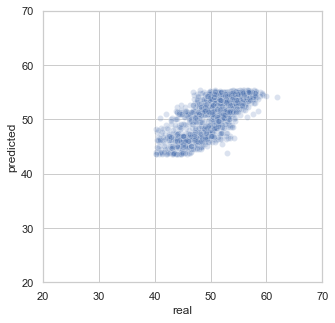

--------------------------
CAI Galerias
Cantidad de datos a predecir: 1352.00
Test performance:
Mean squared error: 5.48
RMSE: 2.34
R2: 0.72


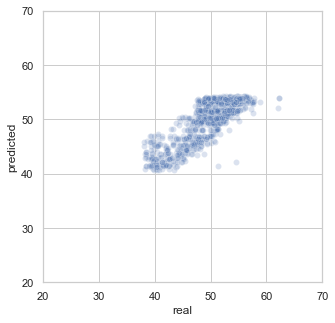

--------------------------
Restrepo
Cantidad de datos a predecir: 1632.00
Test performance:
Mean squared error: 12.00
RMSE: 3.46
R2: 0.36


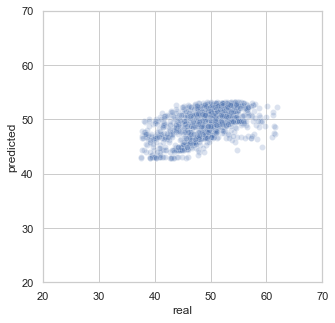

--------------------------
Edificio Profesional
Cantidad de datos a predecir: 1641.00
Test performance:
Mean squared error: 12.49
RMSE: 3.53
R2: 0.26


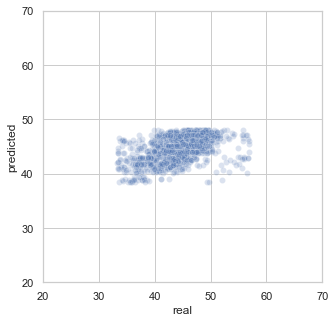

--------------------------
CAI 7 de Agosto
Cantidad de datos a predecir: 279.00
Test performance:
Mean squared error: 1.53
RMSE: 1.24
R2: 0.85


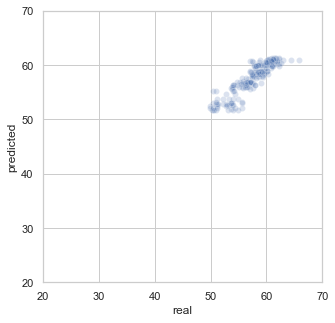

--------------------------
CAI Villa Nidia
Cantidad de datos a predecir: 2128.00
Test performance:
Mean squared error: 3.76
RMSE: 1.94
R2: 0.80


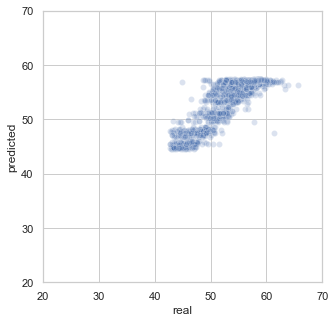

--------------------------
Cruz Roja
Cantidad de datos a predecir: 430.00
Test performance:
Mean squared error: 8.46
RMSE: 2.91
R2: 0.43


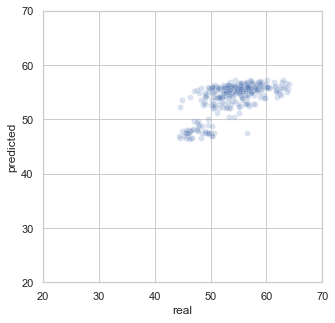

--------------------------
Fin


In [135]:
performance_dict = {}
for station in leq_test['Estación'].unique():
    print(station)
    station_test = leq_test[leq_test.Estación==station]
    datos=len(station_test)
    
    print('Cantidad de datos a predecir: %.2f'%datos)
    data_features_test_station =station_test[features_list]
    data_target_test_station =station_test.Valor_mean
    
    # Make predictions for the station
    station_pred_test_gb = gb_model.predict(data_features_test_station.astype(float))
    
    
    mse=mean_squared_error(data_target_test_station, station_pred_test_gb)
    rmse = mean_squared_error(data_target_test_station, station_pred_test_gb,squared=False)
    r2 = r2_score(data_target_test_station, station_pred_test_gb)
    
    
    perf_dict ={
        'mse': mse,
        'rmse': rmse,
        'r2': r2,
        'cantidad de datos': datos
    }
    
    performance_dict[station]=perf_dict
    
    print('Test performance:')
    print('Mean squared error: %.2f'%mse)
    print('RMSE: %.2f'%rmse)
    print('R2: %.2f'%r2)
    seaborn.set(rc={'figure.figsize':(5,5)})
    seaborn.set_style("whitegrid")
    ax = seaborn.scatterplot(data_target_test_station.values,station_pred_test_gb,alpha=0.2)
    ax.set(xlabel='real', ylabel='predicted')
    ax.set(xlim=(20,70),ylim=(20,70))

    plt.show()
    print('--------------------------')
    
print("Fin")

In [138]:
performance_df = pd.DataFrame(performance_dict).T

In [139]:
performance_df.sort_values('r2',ascending=False)

mse      rmse        r2  cantidad de datos
CAI 7 de Agosto        1.525320  1.235039  0.851331              279.0
CAI Villa Nidia        3.762748  1.939780  0.796316             2128.0
CAI Venecia            3.260543  1.805697  0.782961             2074.0
CAI Claret             2.841256  1.685603  0.759486             1969.0
CAI Jaboque            4.262285  2.064530  0.730442             1308.0
CAI Tejar              3.753360  1.937359  0.728556             1353.0
CAI Las Ferias         5.199796  2.280306  0.728071             1084.0
CAI Galerias           5.478358  2.340589  0.721812             1352.0
CAI Alamos             4.804664  2.191954  0.713098             1984.0
CAI Navarra            2.903356  1.703924  0.704426             1195.0
Santa Cecilia         15.896897  3.987091  0.695784             2061.0
CAI Serena             3.303866  1.817654  0.674421             1432.0
CAI Normandia          4.605323  2.146002  0.674202             2061.0
CAI Quirigua           2.661129  1.631297  0.661602             1769.0
CAI Rincon             5.245267  2.290255  0.659694             1923.0
CAI Villa del Prado    3.208216  1.791149  0.627947             1159.0
CAI 20 de Julio        6.023616  2.454306  0.624317             2101.0
CAI Roma               2.810287  1.676391  0.606895             1145.0
CAI Americas           2.952157  1.718184  0.552039             1905.0
Cruz Roja              8.460513  2.908696  0.430792              430.0
CAI San Victorino      8.533495  2.921215  0.413426              961.0
Fontibón               3.870874  1.967454  0.413081             1419.0
Edificio Marly        10.633848  3.260958  0.407431             1843.0
SDA                   35.426942  5.952054  0.394712             2014.0
Restrepo              11.999493  3.464028  0.361916             1632.0
Edificio Profesional  12.493292  3.534585  0.263084             1641.0
Hotel Morrison        29.503381  5.431701  0.181878             1434.0
CAI Aurora            46.293542  6.803936  0.079134              488.0

In [141]:
performance_df.sort_values('rmse',ascending=True)

mse      rmse        r2  cantidad de datos
CAI 7 de Agosto        1.525320  1.235039  0.851331              279.0
CAI Quirigua           2.661129  1.631297  0.661602             1769.0
CAI Roma               2.810287  1.676391  0.606895             1145.0
CAI Claret             2.841256  1.685603  0.759486             1969.0
CAI Navarra            2.903356  1.703924  0.704426             1195.0
CAI Americas           2.952157  1.718184  0.552039             1905.0
CAI Villa del Prado    3.208216  1.791149  0.627947             1159.0
CAI Venecia            3.260543  1.805697  0.782961             2074.0
CAI Serena             3.303866  1.817654  0.674421             1432.0
CAI Tejar              3.753360  1.937359  0.728556             1353.0
CAI Villa Nidia        3.762748  1.939780  0.796316             2128.0
Fontibón               3.870874  1.967454  0.413081             1419.0
CAI Jaboque            4.262285  2.064530  0.730442             1308.0
CAI Normandia          4.605323  2.146002  0.674202             2061.0
CAI Alamos             4.804664  2.191954  0.713098             1984.0
CAI Las Ferias         5.199796  2.280306  0.728071             1084.0
CAI Rincon             5.245267  2.290255  0.659694             1923.0
CAI Galerias           5.478358  2.340589  0.721812             1352.0
CAI 20 de Julio        6.023616  2.454306  0.624317             2101.0
Cruz Roja              8.460513  2.908696  0.430792              430.0
CAI San Victorino      8.533495  2.921215  0.413426              961.0
Edificio Marly        10.633848  3.260958  0.407431             1843.0
Restrepo              11.999493  3.464028  0.361916             1632.0
Edificio Profesional  12.493292  3.534585  0.263084             1641.0
Santa Cecilia         15.896897  3.987091  0.695784             2061.0
Hotel Morrison        29.503381  5.431701  0.181878             1434.0
SDA                   35.426942  5.952054  0.394712             2014.0
CAI Aurora            46.293542  6.803936  0.079134              488.0

# Add Uber Data

In [147]:
traffic_index = pd.read_csv(otros_path + 'cleaned_data/hourly_traffic_index.csv',sep=',')

In [150]:
traffic_index=traffic_index.drop(['Unnamed: 0','UBER_ID'],axis=1)

In [164]:
traffic_index.head(5)

hod  hourly_traffic_index  Nombre_estacion
0    0             -1.276806  CAI 20 de Julio
1    1             -1.309597  CAI 20 de Julio
2    2             -1.043960  CAI 20 de Julio
3    3             -1.224175  CAI 20 de Julio
4    4             -0.950977  CAI 20 de Julio

In [159]:
len(merged_df_leq_not_na.Estación.unique())

28

In [163]:
traffic_index.hod=traffic_index.hod.astype('int')

In [154]:
len(traffic_index.Nombre_estacion.unique())

28

In [165]:
merged_df_leq_not_na.columns

Index(['Componente', 'Estación', 'Variable', 'Date_no_hour', 'Hora',
       'Valor_max', 'Valor_mean', 'Valor_median', 'Valor_min', 'max-min',
       ...
       'TP9_3_6_NO', 'TP9_3_7_NO', 'TP9_3_8_NO', 'TP9_3_99_N', 'TP9_3_9_NO',
       'TP9_3_USO', 'TP9_4_USO', 'TVIVIENDA', 'Fecha', 'weekday'],
      dtype='object', length=112)

In [167]:
merged_uber = merged_df_leq_not_na.merge(traffic_index,how='left',left_on=['Estación','Hora'],right_on=['Nombre_estacion','hod'])

In [168]:
merged_uber.head()

Componente         Estación Variable Date_no_hour  Hora  Valor_max  \
0      Ruido  CAI 20 de Julio      Leq   2019-04-10     1       65.1   
1      Ruido  CAI 20 de Julio      Leq   2019-05-08     0       62.2   
2      Ruido  CAI 20 de Julio      Leq   2019-05-08     1       59.7   
3      Ruido  CAI 20 de Julio      Leq   2019-05-08     2       62.1   
4      Ruido  CAI 20 de Julio      Leq   2019-05-08     3       58.2   

   Valor_mean  Valor_median  Valor_min  max-min  ... TP9_3_99_N  TP9_3_9_NO  \
0   63.800000         63.80       62.5      2.6  ...        4.0         0.0   
1   46.367647         48.80       17.3     44.9  ...        4.0         0.0   
2   45.020588         46.10       18.2     41.5  ...        4.0         0.0   
3   45.908824         46.80       17.9     44.2  ...        4.0         0.0   
4   44.785294         45.35       16.8     41.4  ...        4.0         0.0   

   TP9_3_USO TP9_4_USO  TVIVIENDA       Fecha  weekday  hod  \
0     1049.0       0.0     3743.0  2019-04-10        3    1   
1     1049.0       0.0     3743.0  2019-05-08        3    0   
2     1049.0       0.0     3743.0  2019-05-08        3    1   
3     1049.0       0.0     3743.0  2019-05-08        3    2   
4     1049.0       0.0     3743.0  2019-05-08        3    3   

   hourly_traffic_index  Nombre_estacion  
0             -1.309597  CAI 20 de Julio  
1             -1.276806  CAI 20 de Julio  
2             -1.309597  CAI 20 de Julio  
3             -1.043960  CAI 20 de Julio  
4             -1.224175  CAI 20 de Julio  

[5 rows x 115 columns]

In [169]:
# Split Train, and Test Data
leq_train_2, leq_test_2, data_target_train_2, data_target_test_2 = train_test_split(merged_uber,merged_uber.Valor_mean, test_size=0.2, random_state=123)

In [170]:
features_list_2= [
    'Hora', 'latitud', 'longitud', 'weekday', 'conteo_bares_500m',
    'conteo_bares_1km', 'conteo_bares_2km', 'conteo_colegios_500m',
    'conteo_colegios_1km', 'conteo_colegios_2km', 'conteo_hoteles_500m',
    'conteo_hoteles_1km', 'conteo_hoteles_2km', 'conteo_ips_500m',
    'conteo_ips_1km', 'conteo_ips_2km', 'AREA', 'CTNENCUEST', 'DENSIDAD',
    'OBJECTID_1', 'OID', 'PERSONAS_L', 'PERSONAS_S', 'TP14_1_TIP',
    'TP14_2_TIP', 'TP14_3_TIP', 'TP14_4_TIP', 'TP14_5_TIP', 'TP14_6_TIP',
    'TP15_1_OCU', 'TP15_2_OCU', 'TP15_3_OCU', 'TP15_4_OCU', 'TP16_HOG',
    'TP19_ACU_1', 'TP19_ACU_2', 'TP19_ALC_1', 'TP19_ALC_2', 'TP19_EE_1',
    'TP19_EE_2', 'TP19_EE_E1', 'TP19_EE_E2', 'TP19_EE_E3', 'TP19_EE_E4',
    'TP19_EE_E5', 'TP19_EE_E6', 'TP19_EE_E9', 'TP19_GAS_1', 'TP19_GAS_2',
    'TP19_GAS_9', 'TP19_INTE1', 'TP19_INTE2', 'TP19_INTE9', 'TP19_RECB1',
    'TP19_RECB2', 'TP27_PERSO', 'TP32_1_SEX', 'TP32_2_SEX', 'TP34_1_EDA',
    'TP34_2_EDA', 'TP34_3_EDA', 'TP34_4_EDA', 'TP34_5_EDA', 'TP34_6_EDA',
    'TP34_7_EDA', 'TP34_8_EDA', 'TP34_9_EDA', 'TP3A_RI', 'TP3B_TCN',
    'TP3_1_SI', 'TP3_2_NO', 'TP4_1_SI', 'TP4_2_NO', 'TP51POSTGR', 'TP51PRIMAR',
    'TP51SECUND', 'TP51SUPERI', 'TP51_13_ED', 'TP51_99_ED', 'TP9_1_USO',
    'TP9_2_1_MI', 'TP9_2_2_MI', 'TP9_2_3_MI', 'TP9_2_4_MI', 'TP9_2_9_MI',
    'TP9_2_USO', 'TP9_3_10_N', 'TP9_3_1_NO', 'TP9_3_2_NO', 'TP9_3_3_NO',
    'TP9_3_4_NO', 'TP9_3_5_NO', 'TP9_3_6_NO', 'TP9_3_7_NO', 'TP9_3_8_NO',
    'TP9_3_99_N', 'TP9_3_9_NO', 'TP9_3_USO', 'TP9_4_USO', 'TVIVIENDA','hourly_traffic_index'
]

In [171]:
not_useful = ['TP9_4_USO','TP9_2_4_MI','TP3A_RI','TP3B_TCN','TP3_1_SI','PERSONAS_L']

In [172]:
features_list_2  = [x for x in features_list_2 if x not in not_useful]

In [174]:
data_features_train_2 =leq_train_2[features_list_2]
data_features_test_2 =leq_test_2[features_list_2]

## Linear Model

In [175]:
regr_2 = linear_model.LinearRegression()

In [176]:
regr_2.fit(data_features_train_2.astype(float),data_target_train_2.astype(float))

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [177]:
ruido_pred_2 = regr_2.predict(data_features_train_2.astype(float))

In [178]:
# print('Coefficients: \n', regr.coef_)
print('Mean squared error: %.2f'
      % mean_squared_error(data_target_train_2, ruido_pred_2))
print('RMSE: %.2f'
      %  mean_squared_error(data_target_train_2, ruido_pred_2,squared=False))
print('R2: %.2f'
      % r2_score(data_target_train_2, ruido_pred_2))

Mean squared error: 13.35
RMSE: 3.65
R2: 0.68


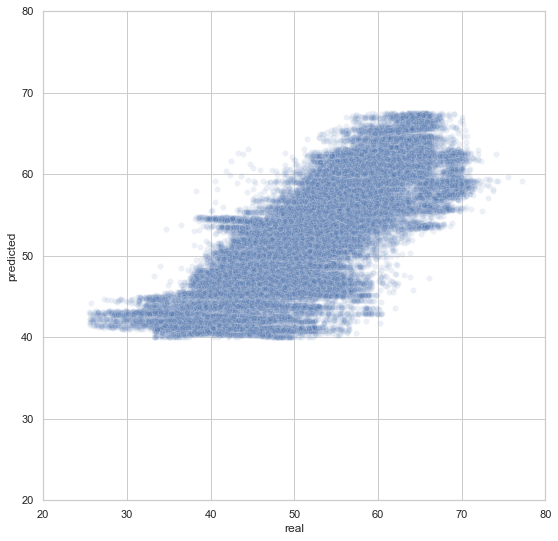

In [179]:
seaborn.set(rc={'figure.figsize':(9,9)})
seaborn.set_style("whitegrid")
ax = seaborn.scatterplot(data_target_train_2.values,ruido_pred_2,alpha=0.1)
ax.set(xlabel='real', ylabel='predicted')
ax.set(xlim=(20,80),ylim=(20,80))

plt.show()

## Gradient Boosting

In [237]:
gb_model_2 = GradientBoostingRegressor(n_estimators=100, 
                                       #min_samples_leaf=800,
                                       random_state=0,
                                       max_depth=10
                                      )

In [ ]:
# Training data
gb_model_2.fit(data_features_train_2.astype(float),data_target_train_2.astype(float))

In [ ]:
# Make predictions using the train set
ruido_pred_train_gb_2 = gb_model_2.predict(data_features_train_2.astype(float))

In [ ]:
# Make predictions using the test set
ruido_pred_test_gb_2 = gb_model_2.predict(data_features_test_2.astype(float))

In [ ]:
print('Train performance:')
print('Mean squared error: %.2f'
      % mean_squared_error(data_target_train_2, ruido_pred_train_gb_2))
print('RMSE: %.2f'
      %  mean_squared_error(data_target_train_2, ruido_pred_train_gb_2,squared=False))
print('R2: %.2f'
      % r2_score(data_target_train_2, ruido_pred_train_gb_2))

print('--------------------------')
print('Test performance:')
print('Mean squared error: %.2f'
      % mean_squared_error(data_target_test_2, ruido_pred_test_gb_2))
print('RMSE: %.2f'
      %  mean_squared_error(data_target_test_2, ruido_pred_test_gb_2,squared=False))
print('R2: %.2f'
      % r2_score(data_target_test_2, ruido_pred_test_gb_2))

In [235]:
feature_importance_2 = pd.DataFrame()
feature_importance_2['features'] = list(data_features_train_2.columns)
feature_importance_2['importance'] = list(gb_model_2.feature_importances_)
feature_importance_2.sort_values('importance',ascending=False)

features  importance
80             TP9_2_USO    0.266217
13       conteo_ips_500m    0.154450
94  hourly_traffic_index    0.130442
0                   Hora    0.128937
69            TP51POSTGR    0.065446
14        conteo_ips_1km    0.043375
74            TP51_99_ED    0.035789
3                weekday    0.023432
30            TP15_3_OCU    0.020613
2               longitud    0.009021
44            TP19_EE_E6    0.008788
29            TP15_2_OCU    0.008013
39            TP19_EE_E1    0.007529
64            TP34_8_EDA    0.007486
88            TP9_3_7_NO    0.007424
41            TP19_EE_E3    0.004814
22            TP14_1_TIP    0.004694
40            TP19_EE_E2    0.004622
12    conteo_hoteles_2km    0.004482
34            TP19_ACU_2    0.003732
20                   OID    0.003156
57            TP34_1_EDA    0.003084
11    conteo_hoteles_1km    0.003064
15        conteo_ips_2km    0.002815
5       conteo_bares_1km    0.002042
76            TP9_2_1_MI    0.001976
47            TP19_GAS_2    0.001911
81            TP9_3_10_N    0.001839
77            TP9_2_2_MI    0.001681
82            TP9_3_1_NO    0.001644
21            PERSONAS_S    0.001591
55            TP32_1_SEX    0.001561
78            TP9_2_3_MI    0.001536
23            TP14_2_TIP    0.001430
7   conteo_colegios_500m    0.001403
9    conteo_colegios_2km    0.001358
42            TP19_EE_E4    0.001274
31            TP15_4_OCU    0.001254
90            TP9_3_99_N    0.001119
87            TP9_3_6_NO    0.001108
16                  AREA    0.001102
83            TP9_3_2_NO    0.001053
6       conteo_bares_2km    0.001046
65            TP34_9_EDA    0.001015
51            TP19_INTE9    0.000986
72            TP51SUPERI    0.000956
26            TP14_5_TIP    0.000826
18              DENSIDAD    0.000822
85            TP9_3_4_NO    0.000816
36            TP19_ALC_2    0.000750
58            TP34_2_EDA    0.000724
89            TP9_3_8_NO    0.000721
19            OBJECTID_1    0.000718
93             TVIVIENDA    0.000673
56            TP32_2_SEX    0.000667
50            TP19_INTE2    0.000657
37             TP19_EE_1    0.000621
43            TP19_EE_E5    0.000557
71            TP51SECUND    0.000471
1                latitud    0.000462
17            CTNENCUEST    0.000458
48            TP19_GAS_9    0.000437
68              TP4_2_NO    0.000432
35            TP19_ALC_1    0.000428
61            TP34_5_EDA    0.000423
10   conteo_hoteles_500m    0.000416
86            TP9_3_5_NO    0.000393
63            TP34_7_EDA    0.000379
8    conteo_colegios_1km    0.000372
24            TP14_3_TIP    0.000347
84            TP9_3_3_NO    0.000344
62            TP34_6_EDA    0.000340
27            TP14_6_TIP    0.000322
73            TP51_13_ED    0.000321
38             TP19_EE_2    0.000312
54            TP27_PERSO    0.000306
45            TP19_EE_E9    0.000270
32              TP16_HOG    0.000224
91            TP9_3_9_NO    0.000218
28            TP15_1_OCU    0.000204
75             TP9_1_USO    0.000186
92             TP9_3_USO    0.000184
49            TP19_INTE1    0.000140
33            TP19_ACU_1    0.000129
25            TP14_4_TIP    0.000121
66              TP3_2_NO    0.000102
52            TP19_RECB1    0.000079
4      conteo_bares_500m    0.000078
53            TP19_RECB2    0.000076
70            TP51PRIMAR    0.000072
46            TP19_GAS_1    0.000051
60            TP34_4_EDA    0.000036
59            TP34_3_EDA    0.000008
79            TP9_2_9_MI    0.000000
67              TP4_1_SI    0.000000

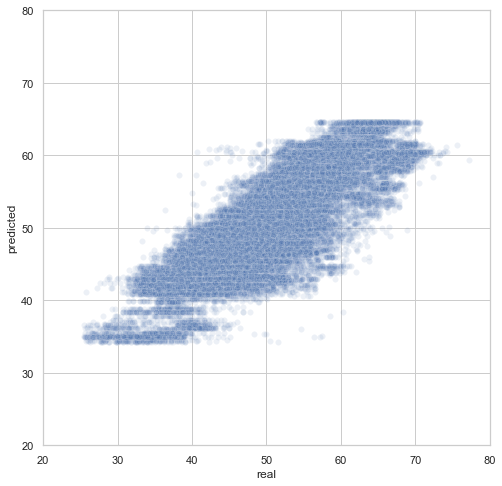

In [211]:
seaborn.set(rc={'figure.figsize':(8,8)})
seaborn.set_style("whitegrid")
ax = seaborn.scatterplot(data_target_train_2.values,ruido_pred_train_gb_2,alpha=0.1)
ax.set(xlabel='real', ylabel='predicted')
ax.set(xlim=(20,80),ylim=(20,80))

plt.show()

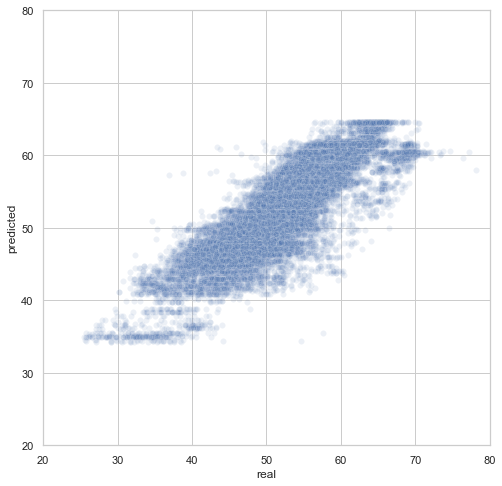

In [212]:
seaborn.set(rc={'figure.figsize':(8,8)})
seaborn.set_style("whitegrid")
ax = seaborn.scatterplot(data_target_test_2.values,ruido_pred_test_gb_2,alpha=0.1)
ax.set(xlabel='real', ylabel='predicted')
ax.set(xlim=(20,80),ylim=(20,80))

plt.show()

## Test for each station

In [193]:
test_df_2 = leq_test_2.copy()

In [194]:
test_df["Valor_mean_pred"] = ruido_pred_test_gb_2

In [195]:
test_df.head()

Componente        Estación Variable Date_no_hour  Hora  Valor_max  \
71464       Ruido   CAI Normandia      Leq   2019-05-17     3       70.7   
42733       Ruido      CAI Claret      Leq   2020-04-18    23       63.8   
75601       Ruido   CAI Normandia      Leq   2019-11-10     9       76.2   
157546      Ruido  Edificio Marly      Leq   2019-06-25     8       61.7   
75617       Ruido   CAI Normandia      Leq   2019-11-11     1       70.1   

        Valor_mean  Valor_median  Valor_min  max-min  ... TP9_3_7_NO  \
71464    55.738235         59.75       19.9     50.8  ...        7.0   
42733    48.067647         50.70       18.3     45.5  ...        5.0   
75601    63.552941         63.20       50.0     26.2  ...        7.0   
157546   47.258824         51.75       13.3     48.4  ...        3.0   
75617    55.755882         56.60       29.7     40.4  ...        7.0   

        TP9_3_8_NO  TP9_3_99_N TP9_3_9_NO  TP9_3_USO  TP9_4_USO  TVIVIENDA  \
71464          0.0         0.0        0.0      788.0        0.0     3555.0   
42733          0.0         5.0        0.0      750.0        0.0     7244.0   
75601          0.0         0.0        0.0      788.0        0.0     3555.0   
157546         1.0         1.0        1.0      756.0        0.0    10295.0   
75617          0.0         0.0        0.0      788.0        0.0     3555.0   

             Fecha  weekday  Valor_mean_pred  
71464   2019-05-17        5        55.184949  
42733   2020-04-18        6        53.217037  
75601   2019-11-10        7        59.780984  
157546  2019-06-25        2        46.421840  
75617   2019-11-11        1        52.036554  

[5 rows x 113 columns]

CAI Normandia
Cantidad de datos a predecir: 2061.00
Test performance:
Mean squared error: 4.61
RMSE: 2.15
R2: 0.67


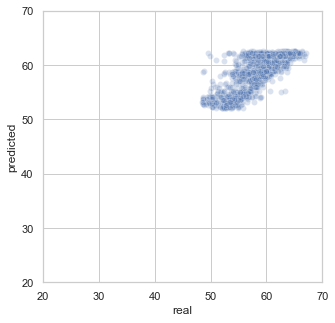

--------------------------
CAI Claret
Cantidad de datos a predecir: 1969.00
Test performance:
Mean squared error: 2.84
RMSE: 1.69
R2: 0.76


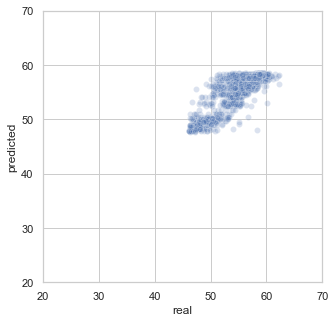

--------------------------
Edificio Marly
Cantidad de datos a predecir: 1843.00
Test performance:
Mean squared error: 10.69
RMSE: 3.27
R2: 0.40


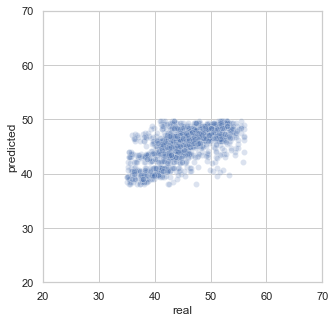

--------------------------
CAI San Victorino
Cantidad de datos a predecir: 961.00
Test performance:
Mean squared error: 8.52
RMSE: 2.92
R2: 0.41


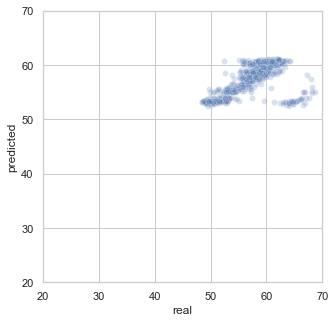

--------------------------
CAI Las Ferias
Cantidad de datos a predecir: 1084.00
Test performance:
Mean squared error: 5.20
RMSE: 2.28
R2: 0.73


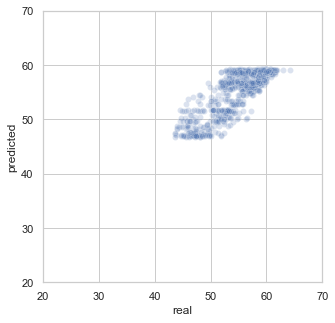

--------------------------
CAI Tejar
Cantidad de datos a predecir: 1353.00
Test performance:
Mean squared error: 3.78
RMSE: 1.94
R2: 0.73


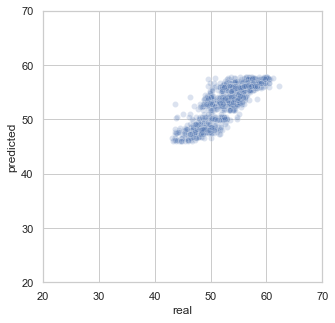

--------------------------
Hotel Morrison
Cantidad de datos a predecir: 1434.00
Test performance:
Mean squared error: 29.55
RMSE: 5.44
R2: 0.18


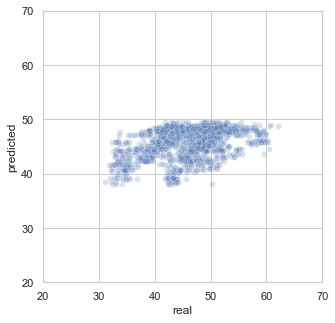

--------------------------
CAI Villa del Prado
Cantidad de datos a predecir: 1159.00
Test performance:
Mean squared error: 3.23
RMSE: 1.80
R2: 0.62


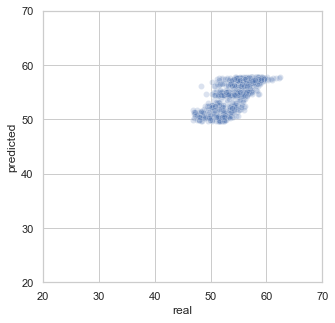

--------------------------
CAI Roma
Cantidad de datos a predecir: 1145.00
Test performance:
Mean squared error: 2.85
RMSE: 1.69
R2: 0.60


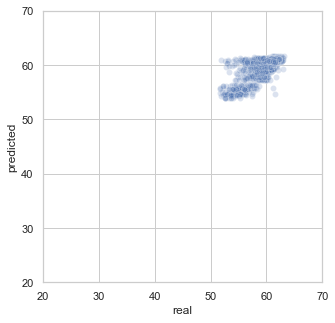

--------------------------
SDA
Cantidad de datos a predecir: 2014.00
Test performance:
Mean squared error: 35.47
RMSE: 5.96
R2: 0.39


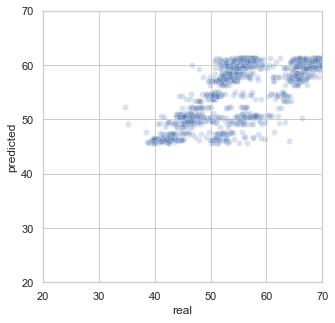

--------------------------
CAI Venecia
Cantidad de datos a predecir: 2074.00
Test performance:
Mean squared error: 3.25
RMSE: 1.80
R2: 0.78


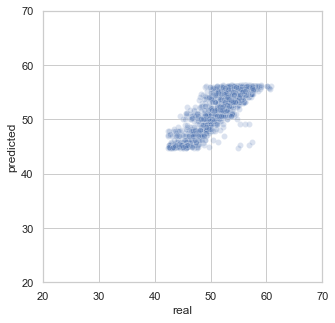

--------------------------
Fontibón
Cantidad de datos a predecir: 1419.00
Test performance:
Mean squared error: 3.88
RMSE: 1.97
R2: 0.41


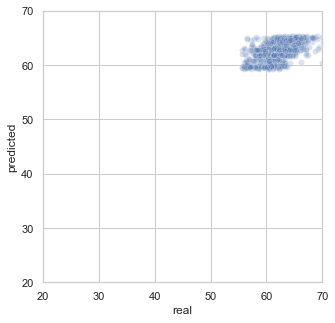

--------------------------
CAI Aurora
Cantidad de datos a predecir: 488.00
Test performance:
Mean squared error: 46.34
RMSE: 6.81
R2: 0.08


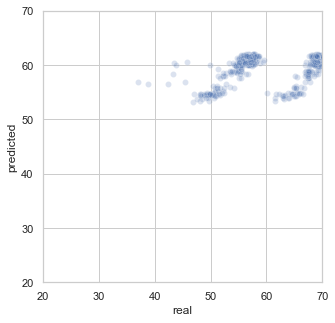

--------------------------
CAI Jaboque
Cantidad de datos a predecir: 1308.00
Test performance:
Mean squared error: 4.28
RMSE: 2.07
R2: 0.73


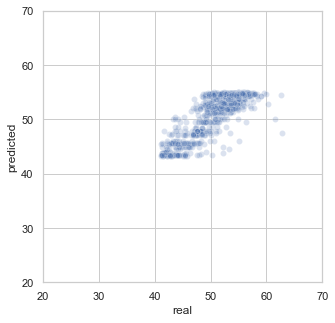

--------------------------
Santa Cecilia
Cantidad de datos a predecir: 2061.00
Test performance:
Mean squared error: 15.93
RMSE: 3.99
R2: 0.70


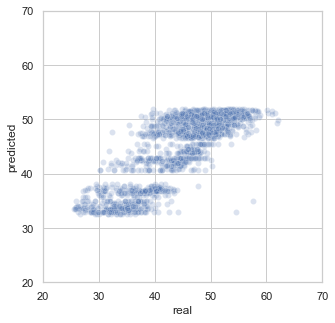

--------------------------
CAI Quirigua
Cantidad de datos a predecir: 1769.00
Test performance:
Mean squared error: 2.67
RMSE: 1.63
R2: 0.66


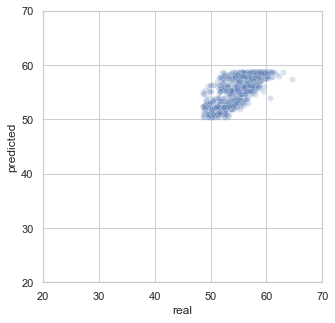

--------------------------
CAI Rincon
Cantidad de datos a predecir: 1923.00
Test performance:
Mean squared error: 5.26
RMSE: 2.29
R2: 0.66


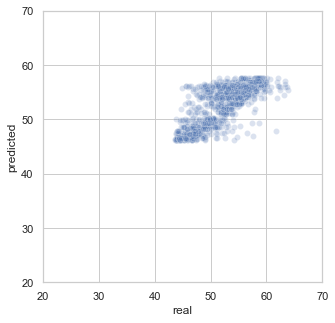

--------------------------
CAI Alamos
Cantidad de datos a predecir: 1984.00
Test performance:
Mean squared error: 4.84
RMSE: 2.20
R2: 0.71


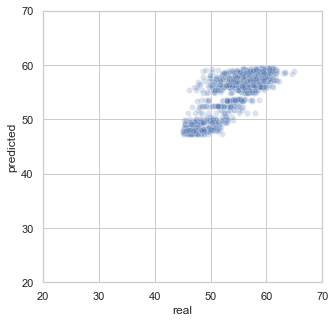

--------------------------
CAI Americas
Cantidad de datos a predecir: 1905.00
Test performance:
Mean squared error: 2.95
RMSE: 1.72
R2: 0.55


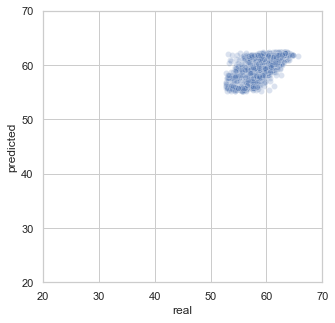

--------------------------
CAI Navarra
Cantidad de datos a predecir: 1195.00
Test performance:
Mean squared error: 2.90
RMSE: 1.70
R2: 0.70


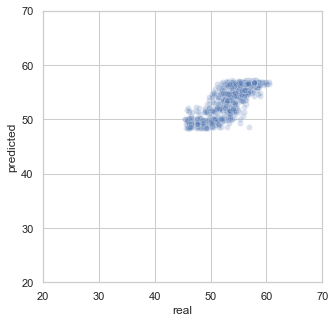

--------------------------
CAI Serena
Cantidad de datos a predecir: 1432.00
Test performance:
Mean squared error: 3.32
RMSE: 1.82
R2: 0.67


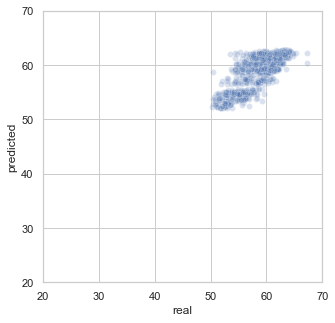

--------------------------
CAI 20 de Julio
Cantidad de datos a predecir: 2101.00
Test performance:
Mean squared error: 5.99
RMSE: 2.45
R2: 0.63


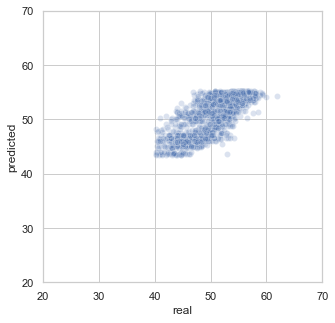

--------------------------
CAI Galerias
Cantidad de datos a predecir: 1352.00
Test performance:
Mean squared error: 5.50
RMSE: 2.35
R2: 0.72


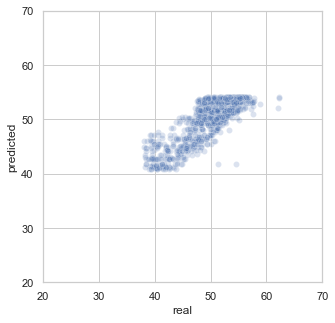

--------------------------
Restrepo
Cantidad de datos a predecir: 1632.00
Test performance:
Mean squared error: 11.98
RMSE: 3.46
R2: 0.36


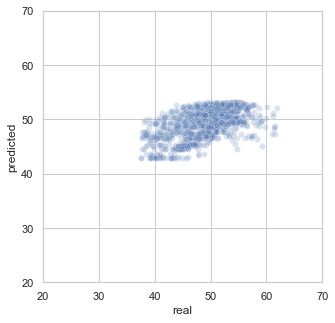

--------------------------
Edificio Profesional
Cantidad de datos a predecir: 1641.00
Test performance:
Mean squared error: 12.45
RMSE: 3.53
R2: 0.27


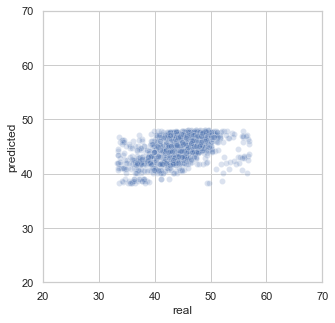

--------------------------
CAI 7 de Agosto
Cantidad de datos a predecir: 279.00
Test performance:
Mean squared error: 1.45
RMSE: 1.21
R2: 0.86


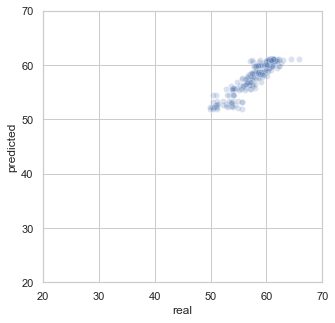

--------------------------
CAI Villa Nidia
Cantidad de datos a predecir: 2128.00
Test performance:
Mean squared error: 3.76
RMSE: 1.94
R2: 0.80


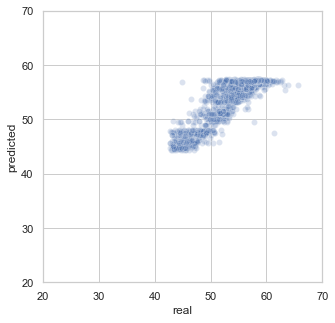

--------------------------
Cruz Roja
Cantidad de datos a predecir: 430.00
Test performance:
Mean squared error: 8.74
RMSE: 2.96
R2: 0.41


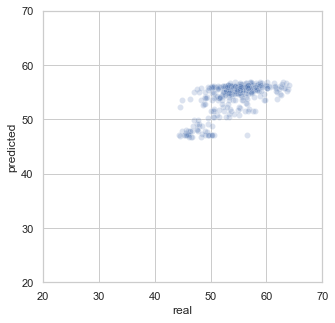

--------------------------
Fin


In [200]:
performance_dict_2 = {}
for station in leq_test_2['Estación'].unique():
    print(station)
    station_test= leq_test_2[leq_test_2.Estación==station]
    datos=len(station_test)
    
    print('Cantidad de datos a predecir: %.2f'%datos)
    data_features_test_station =station_test[features_list_2]
    data_target_test_station =station_test.Valor_mean
    
    # Make predictions for the station
    station_pred_test_gb = gb_model_2.predict(data_features_test_station.astype(float))
    
    
    mse=mean_squared_error(data_target_test_station, station_pred_test_gb)
    rmse = mean_squared_error(data_target_test_station, station_pred_test_gb,squared=False)
    r2 = r2_score(data_target_test_station, station_pred_test_gb)
    
    
    perf_dict ={
        'mse': mse,
        'rmse': rmse,
        'r2': r2,
        'cantidad de datos': datos
    }
    
    performance_dict_2[station]=perf_dict
    
    print('Test performance:')
    print('Mean squared error: %.2f'%mse)
    print('RMSE: %.2f'%rmse)
    print('R2: %.2f'%r2)
    seaborn.set(rc={'figure.figsize':(5,5)})
    seaborn.set_style("whitegrid")
    ax = seaborn.scatterplot(data_target_test_station.values,station_pred_test_gb,alpha=0.2)
    ax.set(xlabel='real', ylabel='predicted')
    ax.set(xlim=(20,70),ylim=(20,70))

    plt.show()
    print('--------------------------')
    
print("Fin")

In [201]:
performance_df_2 = pd.DataFrame(performance_dict_2).T

In [202]:
performance_df_2.sort_values('r2',ascending=False)

mse      rmse        r2  cantidad de datos
CAI 7 de Agosto        1.452478  1.205188  0.858430              279.0
CAI Villa Nidia        3.761606  1.939486  0.796378             2128.0
CAI Venecia            3.247113  1.801975  0.783855             2074.0
CAI Claret             2.844727  1.686632  0.759192             1969.0
CAI Jaboque            4.282074  2.069317  0.729190             1308.0
CAI Las Ferias         5.202067  2.280804  0.727952             1084.0
CAI Tejar              3.779065  1.943982  0.726697             1353.0
CAI Galerias           5.501586  2.345546  0.720633             1352.0
CAI Alamos             4.841429  2.200325  0.710903             1984.0
CAI Navarra            2.901752  1.703453  0.704589             1195.0
Santa Cecilia         15.932625  3.991569  0.695101             2061.0
CAI Normandia          4.610203  2.147138  0.673857             2061.0
CAI Serena             3.319172  1.821859  0.672913             1432.0
CAI Quirigua           2.667583  1.633274  0.660782             1769.0
CAI Rincon             5.256120  2.292623  0.658990             1923.0
CAI 20 de Julio        5.986772  2.446788  0.626615             2101.0
CAI Villa del Prado    3.234177  1.798382  0.624937             1159.0
CAI Roma               2.853294  1.689169  0.600879             1145.0
CAI Americas           2.954602  1.718896  0.551668             1905.0
CAI San Victorino      8.519355  2.918793  0.414398              961.0
Cruz Roja              8.738805  2.956147  0.412069              430.0
Fontibón               3.884446  1.970900  0.411024             1419.0
Edificio Marly        10.686882  3.269080  0.404475             1843.0
SDA                   35.470923  5.955747  0.393960             2014.0
Restrepo              11.980430  3.461276  0.362929             1632.0
Edificio Profesional  12.454700  3.529122  0.265361             1641.0
Hotel Morrison        29.551406  5.436121  0.180546             1434.0
CAI Aurora            46.336685  6.807105  0.078276              488.0

In [203]:
performance_df_2.sort_values('rmse',ascending=True)

mse      rmse        r2  cantidad de datos
CAI 7 de Agosto        1.452478  1.205188  0.858430              279.0
CAI Quirigua           2.667583  1.633274  0.660782             1769.0
CAI Claret             2.844727  1.686632  0.759192             1969.0
CAI Roma               2.853294  1.689169  0.600879             1145.0
CAI Navarra            2.901752  1.703453  0.704589             1195.0
CAI Americas           2.954602  1.718896  0.551668             1905.0
CAI Villa del Prado    3.234177  1.798382  0.624937             1159.0
CAI Venecia            3.247113  1.801975  0.783855             2074.0
CAI Serena             3.319172  1.821859  0.672913             1432.0
CAI Villa Nidia        3.761606  1.939486  0.796378             2128.0
CAI Tejar              3.779065  1.943982  0.726697             1353.0
Fontibón               3.884446  1.970900  0.411024             1419.0
CAI Jaboque            4.282074  2.069317  0.729190             1308.0
CAI Normandia          4.610203  2.147138  0.673857             2061.0
CAI Alamos             4.841429  2.200325  0.710903             1984.0
CAI Las Ferias         5.202067  2.280804  0.727952             1084.0
CAI Rincon             5.256120  2.292623  0.658990             1923.0
CAI Galerias           5.501586  2.345546  0.720633             1352.0
CAI 20 de Julio        5.986772  2.446788  0.626615             2101.0
CAI San Victorino      8.519355  2.918793  0.414398              961.0
Cruz Roja              8.738805  2.956147  0.412069              430.0
Edificio Marly        10.686882  3.269080  0.404475             1843.0
Restrepo              11.980430  3.461276  0.362929             1632.0
Edificio Profesional  12.454700  3.529122  0.265361             1641.0
Santa Cecilia         15.932625  3.991569  0.695101             2061.0
Hotel Morrison        29.551406  5.436121  0.180546             1434.0
SDA                   35.470923  5.955747  0.393960             2014.0
CAI Aurora            46.336685  6.807105  0.078276              488.0